In [661]:
# Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
import statsmodels.formula.api as smf

# Data loading

## Movie data

movie.metadata.tsv.gz [3.4 M]
Metadata for 81,741 movies, extracted from November 4, 2012 dump of Freebase. Tab-separated; columns:
- Wikipedia movie ID
- Freebase movie ID
- Movie name
- Movie release date
- Movie box office revenue
- Movie runtime
- Movie languages (Freebase ID:name tuples)
- Movie countries (Freebase ID:name tuples)
- Movie genres (Freebase ID:name tuples)

In [662]:
# Load films
movies_header = ['wikipedia_id', 'freebase_id', 'name', 'release_date', 'box_office_revenue', 'runtime', 'languages', 'countries', 'genres']
movies = pd.read_csv('data/movie.metadata.tsv', sep='\t', header=None, names=movies_header)
movies.head(5)
print(movies.shape)
#movies['runtime'].hist()


(81741, 9)


In [663]:
movies.head(5)

,wikipedia_id,freebase_id,name,release_date,box_office_revenue,runtime,languages,countries,genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


In [664]:
movies.describe()

,wikipedia_id,box_office_revenue,runtime
count,8.174100e+04,8.401000e+03,6.129100e+04
mean,1.740784e+07,4.799363e+07,1.118192e+02
std,1.098791e+07,1.121753e+08,4.360070e+03
min,3.300000e+02,1.000000e+04,0.000000e+00
25%,7.323695e+06,2.083193e+06,8.100000e+01
50%,1.777899e+07,1.063969e+07,9.300000e+01
75%,2.715573e+07,4.071696e+07,1.060000e+02
max,3.750192e+07,2.782275e+09,1.079281e+06


## Character data

character.metadata.tsv.gz [14 M]
Metadata for 450,669 characters aligned to the movies above, extracted from November 4, 2012 dump of Freebase. Tab-separated; columns:

- Wikipedia movie ID
- Freebase movie ID
- Movie release date
- Character name
- Actor date of birth
- Actor gender
- Actor height (in meters)
- Actor ethnicity (Freebase ID)
- Actor name
- Actor age at movie release
- Freebase character/actor map ID
- Freebase character ID
- Freebase actor ID

In [665]:
# Load characters
characters_header = ['wikipedia_movie_id','freebase_movie_id','movie_release_date','character_name','actor_birthdate','actor_gender','actor_height_meters','actor_ethnicity_freebase_id','actor_name','actor_age_at_movie_release','freebase_character_actor_map_id','freebase_character_id','freebase_actor_id']
characters = pd.read_csv('data/character.metadata.tsv', sep='\t', header=None, names=characters_header)
characters.sample(5)

wikipedia_movie_id freebase_movie_id movie_release_date  \
428203            31240952        /m/0gjb9sf         2011-05-20   
154338            22346977        /m/05s_vd6         1969-07-04   
207657            21702693        /m/05mr00f         2007-08-20   
315149            21015620        /m/05b2s45         2009-04-24   
89665             11959704        /m/02rzp8w         1925-10-04   

       character_name actor_birthdate actor_gender  actor_height_meters  \
428203         Sathya      1986-10-29            F                  NaN   
154338   Franta Lampa      1927-08-11            M                  NaN   
207657   Carl Ackland      1968-11-28            M                 1.85   
315149              Z      1984-02-15            M                  NaN   
89665             NaN      1899-10-20            F                  NaN   

       actor_ethnicity_freebase_id              actor_name  \
428203                   /m/01rv7x      Sridevi Vijaykumar   
154338                         NaN            Václav Babka   
207657                         NaN       Steven Waddington   
315149                         NaN  Peter Anthony Tambakis   
89665                          NaN         Harriet Hammond   

        actor_age_at_movie_release freebase_character_actor_map_id  \
428203                        24.0                      /m/0gj7l15   
154338                        41.0                      /m/0n584t5   
207657                        38.0                      /m/05nxzx5   
315149                        25.0                      /m/0crt5cm   
89665                          NaN                      /m/040j1t0   

       freebase_character_id freebase_actor_id  
428203            /m/0hb6195        /m/04n0p39  
154338            /m/0n584t8        /m/07t408n  
207657            /m/0h76q11        /m/027tc0n  
315149            /m/0h5qz01        /m/02yx310  
89665                    NaN        /m/03cbk67

freebase_character_actor_map_id ?
movies are referred to by wikipedia id or freebase id
lots of data missing especially for: ethnicity, charcter name (maybe some characters aren't named in movies) , 
different date formats for release date 

## IMDB top 1000 data

This dataset includes IMDB top 1,000 movies of all time with attributes such as Title, Certificate, Duration, Genre, etc.
source: https://www.kaggle.com/datasets/omarhanyy/imdb-top-1000

- Poster_Link
- Series_Title: Title of movie
- Release_year: Movie release year
- Certificate
- Runtime [min]
- Genre
- IMDB_Rating: IMDB rating over 10
- Overview: brief summary
- Meta_score: rating by critiques
- Director
- Star 1, 2, 3, 4
- No_of_Votes: Number of votes
- Gross: Gross revenue in US and Canada for all time

In [666]:
imdb_top_1000 = pd.read_csv('data/imdb/imdb_top_1000.csv', thousands=',')

In [667]:
imdb_top_1000.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0


## IMDB budget data:

This dataset includes the ratings for 3828 IMDB movies. 
source: https://github.com/jeremy-lee93/dsc-mod-1-project-v2-1-onl01-dtsc-pt-052620/blob/master/IMDb_budgets.csv

- Movie:  Title of movie
- Year: Movie release year
- IMDb: IMDB rating over 10
- Rating: Certificate
- Runtime [min]
- Genre
- Release Date: Movie release date
- Production Budget: Budget spent for production of the movie
- Domestic Gross: Gross revenue in US and Canada for all time
- Worldwide Gross: Worldwide gross revenue for all time

In [668]:
imdb_budget = pd.read_csv('data/imdb/IMDb_budgets.csv')

In [669]:
imdb_budget.sample(5)

,Movie,Year,IMDb,Rating,Runtime,Genre,Release Date,Production Budget,Domestic Gross,Worldwide Gross
792,The Mummy,2017,5.4,PG-13,110,"Action, Adventure, Fantasy","Jun 2, 2017",195000000,80101125,409953905
2130,Blood Work,2002,6.4,R,110,"Action, Crime, Drama","Aug 9, 2002",50000000,26199517,26199517
2734,Dredd,2012,7.1,R,95,"Action, Crime, Sci-Fi","Sep 7, 2012",45000000,13414714,41467606
3047,Strangers on a Train,1951,8.0,PG,101,"Crime, Film-Noir, Thriller","Jul 3, 1951",1200000,7000000,7020059
3235,Snowpiercer,2013,7.1,R,126,"Action, Drama, Sci-Fi","Aug 1, 2013",40000000,4563029,86808205


In [670]:
imdb_budget.describe()

,Year,IMDb,Runtime,Production Budget,Domestic Gross,Worldwide Gross
count,3828.000000,3828.000000,3828.000000,3.828000e+03,3.828000e+03,3.828000e+03
mean,2003.594044,6.459013,109.940439,4.030960e+07,5.559021e+07,1.206910e+08
std,12.767740,0.996623,20.219674,4.480927e+07,7.403263e+07,1.993646e+08
min,1925.000000,1.500000,63.000000,7.000000e+03,0.000000e+00,0.000000e+00
25%,1999.000000,5.900000,96.000000,1.100000e+07,1.180967e+07,1.690363e+07
50%,2006.000000,6.500000,106.000000,2.500000e+07,3.225471e+07,5.077617e+07
75%,2013.000000,7.100000,120.000000,5.000000e+07,6.848642e+07,1.388776e+08
max,2020.000000,9.300000,271.000000,4.000000e+08,8.583730e+08,2.797801e+09


## Wikipedia

Wikipedia page views statistics
source: this data is crowed from the wikimedia API by the ./utils/extract_wikipedia_pageview_statistics.py script
    
- `name`: Title of a movie
- `date`: date in format *yyyymmddHH*
- `pageviews`: Number of page views for a movie with `name` on a `date`


In [671]:
wikipedia_pageviews = pd.read_csv('./handled_data/movies_wikipedia_pageviews.csv')

In [672]:
wikipedia_pageviews.head()

,movie_name,date,pageviews
0,Avengers: Endgame,2018042600,27
1,Avengers: Endgame,2018042700,115
2,Avengers: Endgame,2018042800,154
3,Avengers: Endgame,2018042900,141
4,Avengers: Endgame,2018043000,59


# Cleaning & Pre-processing of data

In [673]:
movies.describe()

,wikipedia_id,box_office_revenue,runtime
count,8.174100e+04,8.401000e+03,6.129100e+04
mean,1.740784e+07,4.799363e+07,1.118192e+02
std,1.098791e+07,1.121753e+08,4.360070e+03
min,3.300000e+02,1.000000e+04,0.000000e+00
25%,7.323695e+06,2.083193e+06,8.100000e+01
50%,1.777899e+07,1.063969e+07,9.300000e+01
75%,2.715573e+07,4.071696e+07,1.060000e+02
max,3.750192e+07,2.782275e+09,1.079281e+06


In [674]:
characters.describe()

,wikipedia_movie_id,actor_height_meters,actor_age_at_movie_release
count,4.506690e+05,154824.000000,292556.000000
mean,1.396975e+07,1.788893,37.788523
std,1.079662e+07,4.379940,20.587870
min,3.300000e+02,0.610000,-7896.000000
25%,3.759292e+06,1.676400,28.000000
50%,1.189065e+07,1.750000,36.000000
75%,2.366501e+07,1.830000,47.000000
max,3.750192e+07,510.000000,103.000000


In [675]:
# Function to remove encoding: 
remove_encoding = lambda x: np.nan if x == '{}' else \
    [w.replace(' Language', '').replace(' language', '') for w in re.findall(r'"(.*?)"', x)[1::2]]

In [676]:
movies['genres'] = movies['genres'].apply(remove_encoding)
movies['languages'] = movies['languages'].apply(remove_encoding)
movies['countries'] = movies['countries'].apply(remove_encoding)
movies.head()

,wikipedia_id,freebase_id,name,release_date,box_office_revenue,runtime,languages,countries,genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,[English],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,[English],[United States of America],"[Mystery, Biographical film, Drama, Crime Drama]"
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,[Norwegian],[Norway],"[Crime Fiction, Drama]"
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,[English],[United Kingdom],"[Thriller, Erotic thriller, Psychological thri..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,[German],[Germany],[Drama]


In [677]:
movies['countries'].apply(np.shape).min()

()

### Clean release dates

In [678]:
# Replace string 'release_date' column with 3 float columns ['release_year','release_month','release_day']

movies['release_date'] = movies['release_date'].astype('str') # Convert to string all dates
release_date = pd.DataFrame(movies['release_date'].str.split('-', expand=True).values, columns=['release_year','release_month','release_day']) # Split between days, months and year
movies[['release_year','release_month','release_day']] = release_date
movies = movies.drop('release_date', axis=1)


In [679]:
movies.head()

,wikipedia_id,freebase_id,name,box_office_revenue,runtime,languages,countries,genres,release_year,release_month,release_day
0,975900,/m/03vyhn,Ghosts of Mars,14010832.0,98.0,[English],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,...",2001,08,24
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,NaN,95.0,[English],[United States of America],"[Mystery, Biographical film, Drama, Crime Drama]",2000,02,16
2,28463795,/m/0crgdbh,Brun bitter,NaN,83.0,[Norwegian],[Norway],"[Crime Fiction, Drama]",1988,None,None
3,9363483,/m/0285_cd,White Of The Eye,NaN,110.0,[English],[United Kingdom],"[Thriller, Erotic thriller, Psychological thri...",1987,None,None
4,261236,/m/01mrr1,A Woman in Flames,NaN,106.0,[German],[Germany],[Drama],1983,None,None


### Remove data that is out of this world 

In [680]:
def replace_outliers_with_nan(df, col, possible_range):
    df[col] = df[col].apply(lambda x: np.nan if x < possible_range[0] or x > possible_range[1] else x)

#### Movies

In [681]:
possible_movie_runtime_range = [0, 85 * 60] # 85 hours is the Guinness World Record for the longest movie - The Cure for Insomnia

In [682]:
replace_outliers_with_nan(movies, 'runtime', possible_movie_runtime_range)

In [683]:
movies.describe()

,wikipedia_id,box_office_revenue,runtime
count,8.174100e+04,8.401000e+03,61286.000000
mean,1.740784e+07,4.799363e+07,93.651871
std,1.098791e+07,1.121753e+08,51.513103
min,3.300000e+02,1.000000e+04,0.000000
25%,7.323695e+06,2.083193e+06,81.000000
50%,1.777899e+07,1.063969e+07,93.000000
75%,2.715573e+07,4.071696e+07,106.000000
max,3.750192e+07,2.782275e+09,5100.000000


In [684]:
movies[movies['runtime'] == 0]

,wikipedia_id,freebase_id,name,box_office_revenue,runtime,languages,countries,genres,release_year,release_month,release_day
42478,786716,/m/03c6bq,Dickson Experimental Sound Film,NaN,0.0,[English],[United States of America],[Short Film],1894,None,None


The real length of Dickson Experimental Sound Film is 17 seconds which rounded to minutes is 0.

#### Characters

Remove age and height that are incorrect or corrupted

In [685]:
possible_age_range = (0, 150)
possible_height_range = (0, 3)

In [686]:
replace_outliers_with_nan(characters, 'actor_age_at_movie_release', possible_age_range)
replace_outliers_with_nan(characters, 'actor_height_meters', possible_height_range)

A very important characteristic describing the characters is their ethnicity. In the original dataset only the freebase id referring to the ethnicity was available. Thus, a script that can be found in `utils/ethnicities_freebase_ids_script.py` has been created to relate it to the actual labels (p.e. '/m/0152s7' stands for 'Anglo-Irish people'). A CSV has been created to map the ids and the labels, it can be found in `handled_data/ethnicities_freebase_ids.csv`. This is how it looks like:Add ethnicity labels using the freebase ethnicity ids

In [687]:
ethnicity_freebase_ids = pd.read_csv('handled_data/ethnicities_freebase_ids.csv')
ethnicity_freebase_ids.head(5)

,ethnicity_freebase_id,ethnicity_label
0,/m/01267,Albanians
1,/m/012c1l,French Canadians
2,/m/012f86,Ukrainians
3,/m/012fh,Afrikaners
4,/m/01336l,Asian Americans


As it can be seen, the ethnicities are extremely specific and it is very difficult to extract some conclusions. Therefore, we grouped all ethnicities that are repeated more than 10 times into five main ethnic groups: Asian, Black, Latino, Indian and White. This classification can be found in the CSV document in `handled_data/major_ethnicities_clustering.csv`. This is how it looks like:

In [688]:
major_ethnicities = pd.read_csv('handled_data/major_ethnicities_clustering.csv',sep=',');
major_ethnicities.head(10)

,ethnicity_label,major_ethnicity
0,African Americans,Black
1,American Jews,White
2,Americans,White
3,Argentines,Latino
4,Ashkenazi Jews,White
5,Asian Americans,Asian
6,Asian people,Asian
7,Australians,White
8,Austrians,White
9,Bengali people,Indian


Next step is to merge this two tables into the characters main dataframe

In [689]:
characters = pd.merge(characters, ethnicity_freebase_ids, how='left', left_on='actor_ethnicity_freebase_id', right_on='ethnicity_freebase_id')
characters.drop('ethnicity_freebase_id', inplace=True, axis=1)
characters = pd.merge(characters, major_ethnicities, how='left', on='ethnicity_label')

Finally, this the characters main data frame in which we are working

In [690]:
characters.sample(5)

wikipedia_movie_id freebase_movie_id movie_release_date  \
112446            19163528        /m/04lj3xx            1953-11   
299115            28788568        /m/0b6pfz2         1944-10-24   
216649            27253733        /m/0bwm3qb         1951-10-01   
276029            27863458        /m/0c019s5               1993   
433850            27602436        /m/0c3ypjs         2010-03-17   

        character_name actor_birthdate actor_gender  actor_height_meters  \
112446           Wally      1931-05-14            M                  NaN   
299115             NaN      1913-11-09            F                  1.7   
216649             NaN            1899            F                  NaN   
276029             NaN             NaN          NaN                  NaN   
433850  Charles Lawton             NaN            M                  NaN   

       actor_ethnicity_freebase_id      actor_name  \
112446                         NaN    John Forrest   
299115                   /m/0ffj5g     Hedy Lamarr   
216649                         NaN    Doris Rogers   
276029                         NaN      Tiki Tsang   
433850                         NaN  Michael Culkin   

        actor_age_at_movie_release freebase_character_actor_map_id  \
112446                         NaN                      /m/0n55skv   
299115                        30.0                      /m/0gvxjt4   
216649                         NaN                      /m/0g9nzxf   
276029                         NaN                      /m/0gch4wv   
433850                         NaN                      /m/0bj4s5_   

       freebase_character_id freebase_actor_id     ethnicity_label  \
112446            /m/0n55sky        /m/05v7bm2                 NaN   
299115                   NaN         /m/016yqj  Austrian Americans   
216649                   NaN        /m/0g9nzxj                 NaN   
276029                   NaN        /m/0gbyfvq                 NaN   
433850            /m/0bj4s62        /m/0bj4s69                 NaN   

       major_ethnicity  
112446             NaN  
299115             NaN  
216649             NaN  
276029             NaN  
433850             NaN

In [691]:
characters.describe()

,wikipedia_movie_id,actor_height_meters,actor_age_at_movie_release
count,4.536250e+05,157666.000000,294959.000000
mean,1.393780e+07,1.747917,37.925895
std,1.079782e+07,0.106067,14.096938
min,3.300000e+02,0.610000,0.000000
25%,3.738820e+06,1.676400,28.000000
50%,1.180718e+07,1.750000,36.000000
75%,2.362455e+07,1.830000,47.000000
max,3.750192e+07,2.356000,103.000000


### IMDB

In [692]:
imdb_top_1000['Runtime'].str.contains(r'\d+ min').value_counts()

True    1000
Name: Runtime, dtype: int64

In [693]:
imdb_top_1000['Runtime'] = imdb_top_1000['Runtime'].str.extract(r'(\d+) min', expand=False).astype(int)
imdb_top_1000.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0


In [694]:
imdb_top_1000.describe()

,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
count,1000.000000,1000.000000,843.000000,1.000000e+03,8.310000e+02
mean,122.891000,7.949300,77.971530,2.736929e+05,6.803475e+07
std,28.093671,0.275491,12.376099,3.273727e+05,1.097500e+08
min,45.000000,7.600000,28.000000,2.508800e+04,1.305000e+03
25%,103.000000,7.700000,70.000000,5.552625e+04,3.253559e+06
50%,119.000000,7.900000,79.000000,1.385485e+05,2.353089e+07
75%,137.000000,8.100000,87.000000,3.741612e+05,8.075089e+07
max,321.000000,9.300000,100.000000,2.343110e+06,9.366622e+08


### Weighted IMDB rating

To estimate a movie success, we need to both account for the rating 'IMDB_Rating' and to the correponding number of votes 'No_of_Votes'. To do so, we build a new weighted rating based on a shrinkage estimator: 

weighted rating (WR) = (v ÷ (v+m)) × R + (m ÷ (v+m)) × C 

where:

R = average for the movie (mean) = (Rating)

v = number of votes for the movie = (votes)

m = minimum votes required to be listed (currently 25088)

C = the mean vote across the whole report (currently 7.94)

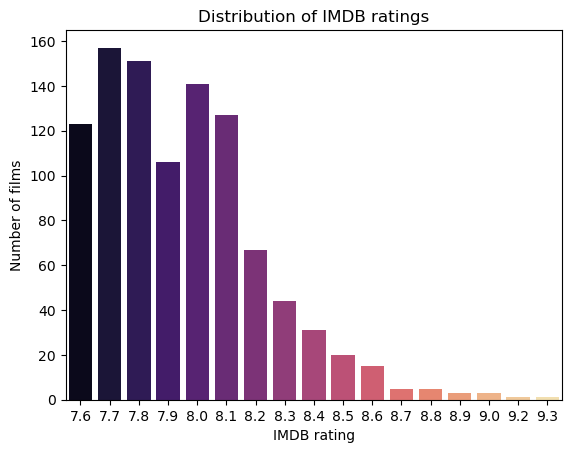

In [695]:
sns.countplot(x='IMDB_Rating', data = imdb_top_1000, palette="magma").set(title='Distribution of IMDB ratings',xlabel='IMDB rating', ylabel='Number of films');


In [696]:
C = imdb_top_1000['IMDB_Rating'].mean()
m = imdb_top_1000['No_of_Votes'].min()
v = imdb_top_1000['No_of_Votes']
R = imdb_top_1000['IMDB_Rating']

In [697]:
imdb_top_1000['WR'] = (v / (v + m)) * R + (m / (v + m)) * C # Complete original dataset


To check if the weighted rating has worked, we display below the best rated movie. We observe that for an IMDB rating of 9/10, the weighted rating WR is better for movies with the most votes. We conclude that this weighted rating is more representative of a movie' success.

In [698]:
imdb_top_1000[['Series_Title','IMDB_Rating','WR','No_of_Votes']].sort_values('WR', ascending=False).head()

,Series_Title,IMDB_Rating,WR,No_of_Votes
0,The Shawshank Redemption,9.3,9.285691,2343110
1,The Godfather,9.2,9.180931,1620367
2,The Dark Knight,9.0,8.988679,2303232
3,The Godfather: Part II,9.0,8.977178,1129952
4,12 Angry Men,9.0,8.963129,689845


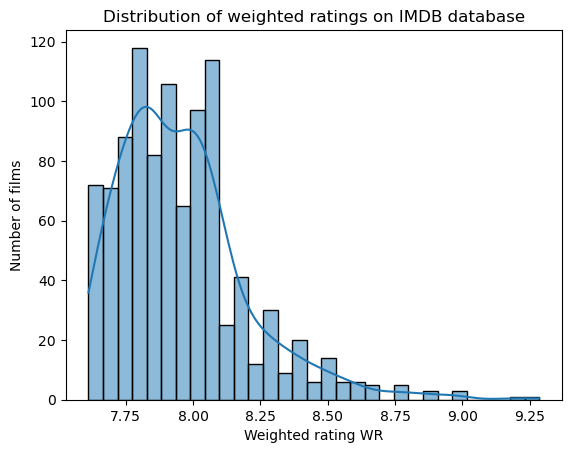

In [699]:
sns.histplot(x='WR', data = imdb_top_1000, kde=True).set(title='Distribution of weighted ratings on IMDB database',xlabel='Weighted rating WR', ylabel='Number of films');


### Merge IMDB database with movie database to have common features

We would like to merge the data from CMU movies and IMDB top 1000. Since we don't want to reduce the size of data, we would rather to an outer merge and fill missing values with NaN.

In [700]:
len((imdb_top_1000['Series_Title'] + imdb_top_1000['Released_Year'].astype(str)).unique()) / len(imdb_top_1000)

1.0

In [701]:
# Remove duplicated movie with video game
movies.drop(movies[movies['wikipedia_id'] == 3184269].index, inplace=True)
# Fix duplicated movie with changing it release year to the correct one based on its wikipedia page
movies.loc[movies['wikipedia_id'] == 25357930, ['release_year']] = "2010"

In [702]:
imdb_top_1000.rename({'Series_Title': 'name', 'Released_Year': 'release_year'}, axis=1, inplace=True)

In [703]:
imdb_top_1000.loc[imdb_top_1000['name'] == 'Apollo 13', 'release_year'] = '1995' # The release year was wrong in the dataset change from PG to 1995 /year was obtained from wikipedia/
movies['release_year'] = movies['release_year'].replace('nan', np.nan).astype('float').astype('Int16')
movies['release_month'] = movies['release_month'].replace('nan', np.nan).astype('float').astype('Int16')
movies['release_day'] = movies['release_day'].replace('nan', np.nan).astype('float').astype('Int16')
imdb_top_1000['release_year'] = imdb_top_1000['release_year'].replace('nan', np.nan).astype('float').astype('Int16')


In [704]:
movie_feature = imdb_top_1000.merge(movies, on=['name', 'release_year'], how='outer')


In [705]:
def fill_NaN(df, column_left, column_right, column_name=None): # Updates missing data from left column with right column data
    if column_name is None:
        column_name = column_left
    df[column_name] = df[column_left].fillna(df[column_right])

In [706]:
movie_feature['Genre'] = movie_feature['Genre'].replace(np.nan, '').apply(lambda x: x.split(', '))

fill_NaN(movie_feature,'runtime','Runtime')
fill_NaN(movie_feature,'genres','Genre')
movie_feature.drop(labels=['Runtime','Genre'], axis=1, inplace=True)

In [707]:
movie_feature.columns

Index(['Poster_Link', 'name', 'release_year', 'Certificate', 'IMDB_Rating',
       'Overview', 'Meta_score', 'Director', 'Star1', 'Star2', 'Star3',
       'Star4', 'No_of_Votes', 'Gross', 'WR', 'wikipedia_id', 'freebase_id',
       'box_office_revenue', 'runtime', 'languages', 'countries', 'genres',
       'release_month', 'release_day'],
      dtype='object')

In [708]:
movie_feature.sample(3)

,Poster_Link,name,release_year,Certificate,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,...,WR,wikipedia_id,freebase_id,box_office_revenue,runtime,languages,countries,genres,release_month,release_day
80662,NaN,Kevin Smith: Too Fat for 40,2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,30882682.0,/m/0gg9mkh,NaN,116.0,NaN,NaN,"[Comedy, Stand-up comedy]",<NA>,<NA>
21936,NaN,Mystery of Snow,2005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,13987389.0,/m/03cq801,NaN,135.0,[Burmese],[Burma],"[Musical, Drama, Adventure]",4,8
61913,NaN,The Private Secretary,1935,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,27289067.0,/m/0bwgk61,NaN,70.0,[English],[United Kingdom],[Comedy],9,<NA>


In [709]:
movie_feature.describe()

,release_year,IMDB_Rating,Meta_score,No_of_Votes,Gross,WR,wikipedia_id,box_office_revenue,runtime,release_month,release_day
count,75235.0,1000.000000,843.000000,1.000000e+03,8.310000e+02,1000.000000,8.174000e+04,8.401000e+03,61695.000000,42666.0,39372.0
mean,1977.602419,7.949300,77.971530,2.736929e+05,6.803475e+07,7.957808,1.740801e+07,4.799363e+07,93.842314,6.692495,15.651656
std,29.11519,0.275491,12.376099,3.273727e+05,1.097500e+08,0.242824,1.098786e+07,1.121753e+08,51.436090,3.483249,8.715623
min,1010.0,7.600000,28.000000,2.508800e+04,1.305000e+03,7.611562,3.300000e+02,1.000000e+04,0.000000,1.0,1.0
25%,1956.0,7.700000,70.000000,5.552625e+04,3.253559e+06,7.799293,7.323722e+06,2.083193e+06,81.000000,4.0,8.0
50%,1985.0,7.900000,79.000000,1.385485e+05,2.353089e+07,7.913042,1.777899e+07,1.063969e+07,93.000000,7.0,16.0
75%,2004.0,8.100000,87.000000,3.741612e+05,8.075089e+07,8.077983,2.715589e+07,4.071696e+07,107.000000,10.0,23.0
max,2020.0,9.300000,100.000000,2.343110e+06,9.366622e+08,9.285691,3.750192e+07,2.782275e+09,5100.000000,12.0,31.0


In [710]:
print(f'There are {(imdb_top_1000.shape[0]+movies.shape[0]) - movie_feature.shape[0]} common elements to both IMDB and Movie Corpus datasets. Knowing that IMDB includes {imdb_top_1000.shape[0]} elements and Movie corpus includes {movies.shape[0]}.')


There are 603 common elements to both IMDB and Movie Corpus datasets. Knowing that IMDB includes 1000 elements and Movie corpus includes 81740.


In [711]:
movie_feature.columns

Index(['Poster_Link', 'name', 'release_year', 'Certificate', 'IMDB_Rating',
       'Overview', 'Meta_score', 'Director', 'Star1', 'Star2', 'Star3',
       'Star4', 'No_of_Votes', 'Gross', 'WR', 'wikipedia_id', 'freebase_id',
       'box_office_revenue', 'runtime', 'languages', 'countries', 'genres',
       'release_month', 'release_day'],
      dtype='object')

[Text(0.5, 1.0, 'Distribution of weighted ratings on merged database'),
 Text(0.5, 0, 'Weighted rating WR'),
 Text(0, 0.5, 'Number of films')]

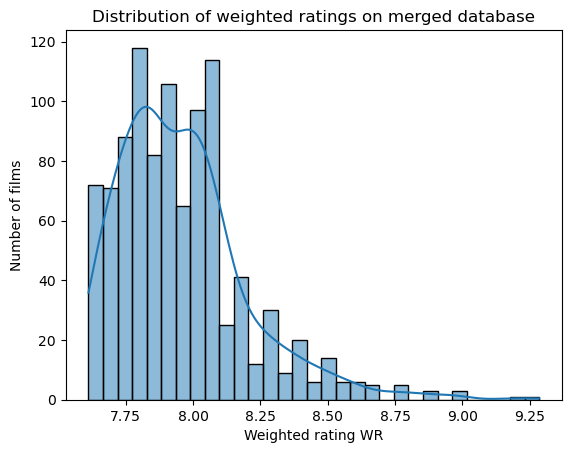

In [712]:
sns.histplot(x='WR', data=movie_feature, kde=True).set(title='Distribution of weighted ratings on merged database',xlabel='Weighted rating WR', ylabel='Number of films')


In [713]:
len((movie_feature['name'] + movie_feature['release_year'].astype(str)).unique()) / len(movie_feature)

0.9977476654857129

### Fill missing budget data from imdb budget dataset

In [714]:
imdb_budget.sample(5)

,Movie,Year,IMDb,Rating,Runtime,Genre,Release Date,Production Budget,Domestic Gross,Worldwide Gross
1776,Money Train,1995,5.7,R,110,"Action, Comedy, Crime","Nov 22, 1995",68000000,35324232,77224232
1397,Poltergeist,2015,4.9,PG-13,93,"Horror, Thriller","May 20, 2015",35000000,47425125,95713069
1887,Paranormal Activity: The Marked Ones,2014,5.0,R,84,"Horror, Mystery, Thriller","Jan 3, 2014",5000000,32462372,90904854
2365,Little Black Book,2004,5.3,PG-13,107,"Comedy, Romance, Drama","Aug 6, 2004",30000000,20422207,21758371
2030,The Five-Year Engagement,2012,6.2,R,124,"Comedy, Romance","Apr 27, 2012",30000000,28700285,61623819


In [715]:
imdb_budget['Release Date'] = imdb_budget['Release Date'].astype('str') # Convert to string all dates
release_date = pd.DataFrame(pd.to_datetime(imdb_budget['Release Date']).apply(lambda x: [x.year, x.month, x.day]).tolist(), columns=['release_year','release_month','release_day'])
imdb_budget[['release_year','release_month','release_day']] = release_date

In [716]:
imdb_budget['release_year'] = imdb_budget['release_year'].astype('Int16')
imdb_budget['release_month'] = imdb_budget['release_month'].astype('Int16')
imdb_budget['release_day'] = imdb_budget['release_day'].astype('Int16')

In [717]:
imdb_budget.drop(['Year', 'Release Date'], axis=1, inplace=True)
imdb_budget.rename({'Movie': 'name', 'Genre': 'genres'}, axis=1, inplace=True)
imdb_budget.columns

Index(['name', 'IMDb', 'Rating', 'Runtime', 'genres', 'Production Budget',
       'Domestic Gross', 'Worldwide Gross', 'release_year', 'release_month',
       'release_day'],
      dtype='object')

In [718]:
imdb_budget['genres'] = imdb_budget['genres'].apply(lambda el: el.split(', '))

In [719]:
imdb_budget.describe()

,IMDb,Runtime,Production Budget,Domestic Gross,Worldwide Gross,release_year,release_month,release_day
count,3828.000000,3828.000000,3.828000e+03,3.828000e+03,3.828000e+03,3828.0,3828.0,3828.0
mean,6.459013,109.940439,4.030960e+07,5.559021e+07,1.206910e+08,2003.594044,7.3221,15.891066
std,0.996623,20.219674,4.480927e+07,7.403263e+07,1.993646e+08,12.76774,3.378479,8.437532
min,1.500000,63.000000,7.000000e+03,0.000000e+00,0.000000e+00,1925.0,1.0,1.0
25%,5.900000,96.000000,1.100000e+07,1.180967e+07,1.690363e+07,1999.0,5.0,9.0
50%,6.500000,106.000000,2.500000e+07,3.225471e+07,5.077617e+07,2006.0,8.0,16.0
75%,7.100000,120.000000,5.000000e+07,6.848642e+07,1.388776e+08,2013.0,10.0,23.0
max,9.300000,271.000000,4.000000e+08,8.583730e+08,2.797801e+09,2020.0,12.0,31.0


In [720]:
len((movie_feature['name'] + str(movie_feature['release_year'])).unique()) / len(movie_feature)

0.9232380047968638

In [721]:
imdb_budget.columns

Index(['name', 'IMDb', 'Rating', 'Runtime', 'genres', 'Production Budget',
       'Domestic Gross', 'Worldwide Gross', 'release_year', 'release_month',
       'release_day'],
      dtype='object')

In [722]:
movie_feature.columns

Index(['Poster_Link', 'name', 'release_year', 'Certificate', 'IMDB_Rating',
       'Overview', 'Meta_score', 'Director', 'Star1', 'Star2', 'Star3',
       'Star4', 'No_of_Votes', 'Gross', 'WR', 'wikipedia_id', 'freebase_id',
       'box_office_revenue', 'runtime', 'languages', 'countries', 'genres',
       'release_month', 'release_day'],
      dtype='object')

In [723]:
movie_feature_with_budget = movie_feature.merge(imdb_budget, on=['name', 'release_year'], how='outer')

In [724]:
movie_feature_with_budget.columns

Index(['Poster_Link', 'name', 'release_year', 'Certificate', 'IMDB_Rating',
       'Overview', 'Meta_score', 'Director', 'Star1', 'Star2', 'Star3',
       'Star4', 'No_of_Votes', 'Gross', 'WR', 'wikipedia_id', 'freebase_id',
       'box_office_revenue', 'runtime', 'languages', 'countries', 'genres_x',
       'release_month_x', 'release_day_x', 'IMDb', 'Rating', 'Runtime',
       'genres_y', 'Production Budget', 'Domestic Gross', 'Worldwide Gross',
       'release_month_y', 'release_day_y'],
      dtype='object')

In [725]:
fill_NaN(movie_feature_with_budget,'genres_x','genres_y','genre')
fill_NaN(movie_feature_with_budget,'release_day_x','release_day_y','release_day')
fill_NaN(movie_feature_with_budget,'release_month_x','release_month_y','release_month')
fill_NaN(movie_feature_with_budget,'Certificate','Rating')
fill_NaN(movie_feature_with_budget,'runtime','Runtime')
fill_NaN(movie_feature_with_budget,'IMDB_Rating','IMDb')

### Investigate the gross difference between the original and the imdb budget datasets

<AxesSubplot:title={'center':'Distribution of the difference of the total worldwide gross data from the two datasets'}, ylabel='Frequency'>

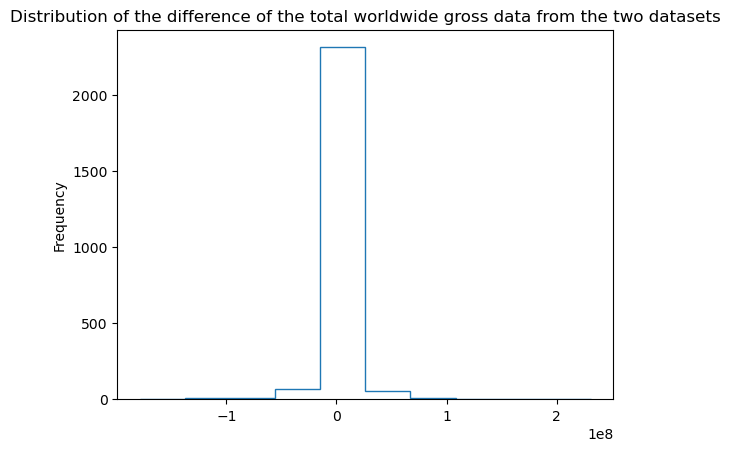

In [726]:
(movie_feature_with_budget['box_office_revenue'] - movie_feature_with_budget['Worldwide Gross']).plot(kind='hist', histtype='step', title='Distribution of the difference of the total worldwide gross data from the two datasets')

<AxesSubplot:title={'center':'Distribution of the percentage in difference of the total worldwide gross data from the two datasets'}, ylabel='Frequency'>

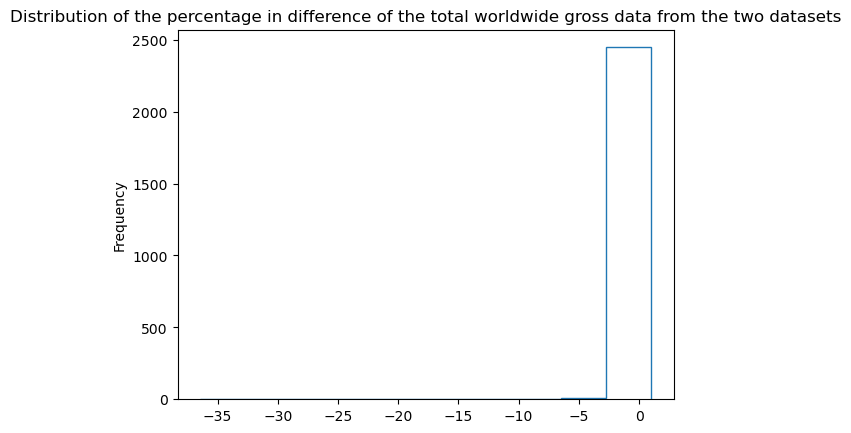

In [727]:
((movie_feature_with_budget['box_office_revenue'] - movie_feature_with_budget['Worldwide Gross']) / movie_feature_with_budget['box_office_revenue']).plot(kind='hist', histtype='step', title='Distribution of the percentage in difference of the total worldwide gross data from the two datasets')

In [728]:
movie_feature_with_budget_differences = movie_feature_with_budget.copy()
movie_feature_with_budget_differences['gross_difference'] = np.abs(movie_feature_with_budget_differences['box_office_revenue'] - movie_feature_with_budget_differences['Worldwide Gross'])
movie_feature_with_budget_differences['gross_difference%'] = ((np.abs(movie_feature_with_budget['box_office_revenue'] - movie_feature_with_budget['Worldwide Gross']) / movie_feature_with_budget['box_office_revenue']) * 100).round(2)

In [729]:
# Difference between the total worldwide gross data from the two datasets
movie_feature_with_budget_differences \
    [(movie_feature_with_budget_differences['gross_difference'] != 0) & (~movie_feature_with_budget_differences['gross_difference'].isna())] \
    .sort_values('gross_difference%', ascending=False) \
    [['name', 'box_office_revenue', 'Worldwide Gross', 'gross_difference', 'gross_difference%']]

,name,box_office_revenue,Worldwide Gross,gross_difference,gross_difference%
2614,The Son of No One,30680.0,1148578.0,1117898.0,3643.74
11355,Restless,163265.0,2772511.0,2609246.0,1598.17
4303,Welcome to Collinwood,336620.0,4606284.0,4269664.0,1268.39
31033,Margaret,46495.0,623292.0,576797.0,1240.56
458,The Wizard of Oz,3017000.0,34949482.0,31932482.0,1058.42
...,...,...,...,...,...
16293,Mrs. Doubtfire,441286195.0,441286003.0,192.0,0.00
795,Ocean's Eleven,450717150.0,450728529.0,11379.0,0.00
78873,The Dead Zone,20766616.0,20766000.0,616.0,0.00
5526,Failure to Launch,128406887.0,128402901.0,3986.0,0.00


In [730]:
# Percentage differences between the gross data from the two datasets
movie_feature_with_budget_differences.describe(percentiles=[.25, .5, .75, .8, .9, .95])[['gross_difference%']]

,gross_difference%
count,2468.000000
mean,16.436353
std,101.362374
min,0.000000
25%,0.020000
50%,0.695000
75%,5.455000
80%,9.888000
90%,34.123000
95%,62.818000


In [731]:
movie_feature_with_budget_differences[movie_feature_with_budget_differences['gross_difference'] == 0].shape[0] / movie_feature_with_budget_differences['gross_difference%'].notna().sum()

0.15842787682333873

In [732]:
movie_feature_with_budget_differences[
    (movie_feature_with_budget_differences['name'] == 'The Son of No One') |
    (movie_feature_with_budget_differences['name'] == 'Restless') |
    (movie_feature_with_budget_differences['name'] == 'Welcome to Collinwood')
][[
    'name', 'box_office_revenue', 'Worldwide Gross'
]]

,name,box_office_revenue,Worldwide Gross
2614,The Son of No One,30680.0,1148578.0
4303,Welcome to Collinwood,336620.0,4606284.0
11355,Restless,163265.0,2772511.0
19658,Restless,NaN,NaN
32477,Restless,NaN,NaN


In [733]:
# gross_difference = box_office_revenue - Worldwide Gross
print((movie_feature_with_budget_differences['box_office_revenue'] - movie_feature_with_budget_differences['Worldwide Gross'] > 0).sum())
print((movie_feature_with_budget_differences['box_office_revenue'] - movie_feature_with_budget_differences['Worldwide Gross'] < 0).sum())
print((movie_feature_with_budget_differences['box_office_revenue'] - movie_feature_with_budget_differences['Worldwide Gross'] == 0).sum())
(movie_feature_with_budget_differences['box_office_revenue'] - movie_feature_with_budget_differences['Worldwide Gross']).describe()

1012
1065
391


count    2.468000e+03
mean     4.134445e+05
std      1.569719e+07
min     -1.785914e+08
25%     -6.153875e+05
50%      0.000000e+00
75%      1.989842e+05
max      2.310745e+08
dtype: float64

We want to fill the missing data from the imdb budget dataset. For this purpose we are comparing the difference between the CMU, imdb top 1000, and imdb budget data. We have the:
 
 * `box_office_revenue` - from CMU with 8401 values /total gross/
 * `Gross` - from imdb top 1000 with 831 values /total gross in US and Canada/
 * `Domestic Gross` - from imdb budget with 3841 values /total gross in US and Canada/
 * `Worldwide Gross` - from imdb budget with 3841 values /total gross/

We would only consider the total worldwide gross since we are investigating movies from the whole world. The information for it is contained in the `box_office_revenue` and `Worldwide Gross`. Only around 20% of the values for the total gross are the same. Also, we know that the other data in `box_office_revenue` is not bigger or smaller than the `Worldwide Gross` for all records. So we can conclude that `box_office_revenue` and `Worldwide Gross` are not connected.

Based on this, we cannot combine the data from the both datasets and we would prefer using the data from the imdb budget dataset because it contains information about the budget of the movie and the data inside seams more accurate based on the comparison of a subset of it with Wikipedia data.

In [734]:
movie_feature_with_budget.columns

Index(['Poster_Link', 'name', 'release_year', 'Certificate', 'IMDB_Rating',
       'Overview', 'Meta_score', 'Director', 'Star1', 'Star2', 'Star3',
       'Star4', 'No_of_Votes', 'Gross', 'WR', 'wikipedia_id', 'freebase_id',
       'box_office_revenue', 'runtime', 'languages', 'countries', 'genres_x',
       'release_month_x', 'release_day_x', 'IMDb', 'Rating', 'Runtime',
       'genres_y', 'Production Budget', 'Domestic Gross', 'Worldwide Gross',
       'release_month_y', 'release_day_y', 'genre', 'release_day',
       'release_month'],
      dtype='object')

In [735]:
# Remove merged extra columns 
movie_feature_with_budget.drop(['box_office_revenue','Domestic Gross','Gross','Rating',
                                'Runtime','IMDb','release_month_x','release_month_y','release_day_x',
                                'release_day_y','genres_x','genres_y'], axis=1, inplace=True)

# Rename gross column
movie_feature_with_budget.rename({'Worldwide Gross': 'total_gross'}, axis=1, inplace=True)

# Remove data that won't be used in the analysis
movie_feature_with_budget.drop(['Poster_Link'], axis=1, inplace=True) 

# Compute profit as success indicator
movie_feature_with_budget['profit'] = movie_feature_with_budget['total_gross'] - movie_feature_with_budget['Production Budget']

In [736]:
movie_feature_with_budget.columns

Index(['name', 'release_year', 'Certificate', 'IMDB_Rating', 'Overview',
       'Meta_score', 'Director', 'Star1', 'Star2', 'Star3', 'Star4',
       'No_of_Votes', 'WR', 'wikipedia_id', 'freebase_id', 'runtime',
       'languages', 'countries', 'Production Budget', 'total_gross', 'genre',
       'release_day', 'release_month', 'profit'],
      dtype='object')

In [737]:
movie_feature_with_budget.describe()

,release_year,IMDB_Rating,Meta_score,No_of_Votes,WR,wikipedia_id,runtime,Production Budget,total_gross,release_day,release_month,profit
count,76183.0,4399.000000,843.000000,1.000000e+03,1000.000000,8.174000e+04,62713.000000,3.841000e+03,3.841000e+03,40599.0,43858.0,3.841000e+03
mean,1978.05941,6.648011,77.971530,2.736929e+05,7.957808,1.740801e+07,94.079673,4.028301e+07,1.205057e+08,15.658834,6.707875,8.022274e+07
std,29.227715,1.058971,12.376099,3.273727e+05,0.242824,1.098786e+07,51.095357,4.475082e+07,1.991119e+08,8.708488,3.483286,1.694921e+08
min,1010.0,1.500000,28.000000,2.508800e+04,7.611562,3.300000e+02,0.000000,7.000000e+03,0.000000e+00,1.0,1.0,-1.580898e+08
25%,1956.0,6.000000,70.000000,5.552625e+04,7.799293,7.323722e+06,82.000000,1.100000e+07,1.686693e+07,8.0,4.0,-3.452140e+05
50%,1986.0,6.700000,79.000000,1.385485e+05,7.913042,1.777899e+07,93.000000,2.500000e+07,5.071937e+07,16.0,7.0,2.289719e+07
75%,2004.0,7.500000,87.000000,3.741612e+05,8.077983,2.715589e+07,107.000000,5.000000e+07,1.379848e+08,23.0,10.0,8.861348e+07
max,2020.0,9.300000,100.000000,2.343110e+06,9.285691,3.750192e+07,5100.000000,4.000000e+08,2.797801e+09,31.0,12.0,2.551701e+09


In [738]:
movie_feature_with_budget.head(5)

,name,release_year,Certificate,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,...,freebase_id,runtime,languages,countries,Production Budget,total_gross,genre,release_day,release_month,profit
0,The Shawshank Redemption,1994,A,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,...,/m/07jnt,142.0,[English],[United States of America],25000000.0,2.841706e+07,"[Crime Fiction, Buddy film, Prison film, Drama...",10,9,3417060.0
1,The Godfather,1972,A,9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,...,/m/07g1sm,177.0,"[Latin, Italian, Sicilian, English]",[United States of America],7000000.0,2.685000e+08,"[Crime Fiction, Gangster Film, Crime Drama, Fa...",15,3,261500000.0
2,The Dark Knight,2008,UA,9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,...,/m/0btpm6,153.0,"[Standard Mandarin, English]","[United States of America, United Kingdom]",185000000.0,1.000743e+09,"[Crime Fiction, Thriller, Superhero movie, Cri...",16,7,815742751.0
3,The Godfather: Part II,1974,A,9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,...,NaN,202.0,NaN,NaN,13000000.0,5.730000e+07,"[Crime, Drama]",11,12,44300000.0
4,12 Angry Men,1957,U,9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,...,/m/0m_tj,96.0,[English],[United States of America],340000.0,0.000000e+00,[Drama],10,4,-340000.0


## Account for inflation: 

As our movie database has movies dating back to 1921, we need to adjust the budgets and profits through an inflation rate.

Source: https://inflationdata.com/Inflation/Inflation/DecadeInflation.asp

In [739]:
# Create dictionary of cumulative inflation rate per decade since 1913 in the US:
inflation_rates = [92.86, 4.82, -18.6, 68.57, 24.58, 28.23, 103.45, 64.41, 33.47, 28.31, 19.38, 1.27]
inflation_rates = [x / 100 + 1 for x in inflation_rates]
decades = list(np.linspace(1913,2023,len(inflation_rates)))
inflation_dic = dict(map(lambda i,j : (i,j) , decades, inflation_rates))

In [740]:
df = movie_feature_with_budget.copy()

In [741]:
# Initialisation
df['profit_modified'] = df['profit']
df['total_gross_modified'] = df['total_gross']
df['budget_modified'] = df['Production Budget']

In [742]:
for k in range(len(decades)-1): # For each decade
    year_before = decades[k]
    year = decades[k+1]
    inflation_rate = inflation_dic[year_before]
    
    decade_df = df[(df['release_year']<year) & (df['release_year']>year_before)] # decade mask
    
    idx = decade_df.index.tolist()

    # Create new column with prices modified by interest rate
    df.loc[idx, 'profit_modified'] = decade_df['profit'] * inflation_rate
    df.loc[idx, 'total_gross_modified'] = decade_df['total_gross'] * inflation_rate
    df.loc[idx, 'budget_modified'] = decade_df['Production Budget'] * inflation_rate

In [743]:
movie_feature_with_budget = df.copy()

In [744]:
movie_feature_with_budget.head(2)

,name,release_year,Certificate,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,...,countries,Production Budget,total_gross,genre,release_day,release_month,profit,profit_modified,total_gross_modified,budget_modified
0,The Shawshank Redemption,1994,A,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,...,[United States of America],25000000.0,28417060.0,"[Crime Fiction, Buddy film, Prison film, Drama...",10,9,3417060.0,4.560750e+06,3.792825e+07,33367500.0
1,The Godfather,1972,A,9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,...,[United States of America],7000000.0,268500000.0,"[Crime Fiction, Gangster Film, Crime Drama, Fa...",15,3,261500000.0,3.353214e+08,3.442976e+08,8976100.0


In [745]:
# Delete the columns for budget which are not modified by inflation rate: 
movie_feature_with_budget.drop(['total_gross','profit', 'Production Budget'], axis=1, inplace=True)

### Wikipedia pageviews

In [746]:
wikipedia_pageviews['date'] = pd.to_datetime(wikipedia_pageviews['date'], format='%Y%m%d%H')

In [747]:
wikipedia_pageviews.sample(5)

,movie_name,date,pageviews
1342817,The Addams Family,2016-10-04,3721
1121305,Lucy,2017-02-19,245
1192319,The Hunt for Red October,2019-10-18,509
1774772,Star Trek: First Contact,2020-05-25,968
1093137,Shutter Island,2020-09-21,300


In [748]:
wikipedia_pageviews.describe()

,pageviews
count,2.301748e+06
mean,1.688527e+03
std,6.576590e+03
min,0.000000e+00
25%,1.170000e+02
50%,8.810000e+02
75%,1.891000e+03
max,1.982874e+06


In [749]:
wikipedia_pageviews.rename({'movie_name': 'name'}, axis=1, inplace=True)

In [750]:
wikipedia_pageviews_mean_per_day = wikipedia_pageviews.groupby('name').mean()
movie_feature_with_budget_and_wikipedia_pageviews = pd.merge(movie_feature_with_budget, wikipedia_pageviews_mean_per_day, on='name', how='left')

/var/folders/m_/fhwnh1jn04qgx3nmt22_5h340000gn/T/ipykernel_34242/1925052420.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  wikipedia_pageviews_mean_per_day = wikipedia_pageviews.groupby('name').mean()


In [751]:
movie_feature_with_budget_and_wikipedia_pageviews.describe()

,release_year,IMDB_Rating,Meta_score,No_of_Votes,WR,wikipedia_id,runtime,release_day,release_month,profit_modified,total_gross_modified,budget_modified,pageviews
count,76183.0,4399.000000,843.000000,1.000000e+03,1000.000000,8.174000e+04,62713.000000,40599.0,43858.0,3.841000e+03,3.841000e+03,3.841000e+03,1198.000000
mean,1978.05941,6.648011,77.971530,2.736929e+05,7.957808,1.740801e+07,94.079673,15.658834,6.707875,1.020213e+08,1.529179e+08,5.089654e+07,1629.608527
std,29.227715,1.058971,12.376099,3.273727e+05,0.242824,1.098786e+07,51.095357,8.708488,3.483286,2.116340e+08,2.471666e+08,5.498706e+07,2306.323344
min,1010.0,1.500000,28.000000,2.508800e+04,7.611562,3.300000e+02,0.000000,1.0,1.0,-1.887276e+08,0.000000e+00,8.981700e+03,0.833333
25%,1956.0,6.000000,70.000000,5.552625e+04,7.799293,7.323722e+06,82.000000,8.0,4.0,-4.548600e+05,2.182930e+07,1.411410e+07,96.998887
50%,1986.0,6.700000,79.000000,1.385485e+05,7.913042,1.777899e+07,93.000000,16.0,7.0,3.032431e+07,6.537242e+07,3.288200e+07,963.526160
75%,2004.0,7.500000,87.000000,3.741612e+05,8.077983,2.715589e+07,107.000000,23.0,10.0,1.134429e+08,1.742373e+08,6.673500e+07,2170.703618
max,2020.0,9.300000,100.000000,2.343110e+06,9.285691,3.750192e+07,5100.000000,31.0,12.0,3.274088e+09,3.578183e+09,4.862949e+08,37415.568125


In [752]:
# For simplicity of use, we rename the dataframe
df_all = movie_feature_with_budget_and_wikipedia_pageviews

For the final dataset obtained, we gather data from 4 different sources. In order to not restrain ourselves to only common features and end up with a smaller dataset, we made the choice of outer merges filled with NaN. Indeed, if we had taken inner merge of all datasets, it might be that our final dataset is both small and not badly representative of the population. 

Having NaN values has however some consequences on our data analysis. It might be that the NaN are not fully random, for instance, runtime for Crime movies are all missing values while we have the runtime for all Comedies. This should ideally be investigated further to check the NaN are indeed random. In the framework of this milestone, the choice was to focus on other tasks. We will thus assume randomness of NaN values.



# Exploratory Data Analysis

## Success indicators

Success of a movie can be very subjective. We thus need to diversify our definitions of success to have a holistic view of our dataset. The following success indicators are considered: 
- How well a movie is received: 
    IMDB ratings which should be weighted by the number of votes
- How profitable a movie is: 
    Overall gross revenue of the movie OR profit = gross revenue - budget spent
- How long a movie will last in time: 
    Number of connection to the movie wikipedia page


## Explore data

Looking at the impacts of features on eachother by drawing a correlation heatmap

/var/folders/m_/fhwnh1jn04qgx3nmt22_5h340000gn/T/ipykernel_34242/2314911968.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_all.corr(), annot=True, ax=ax).set(title='Heat map of correlations between different movie features');


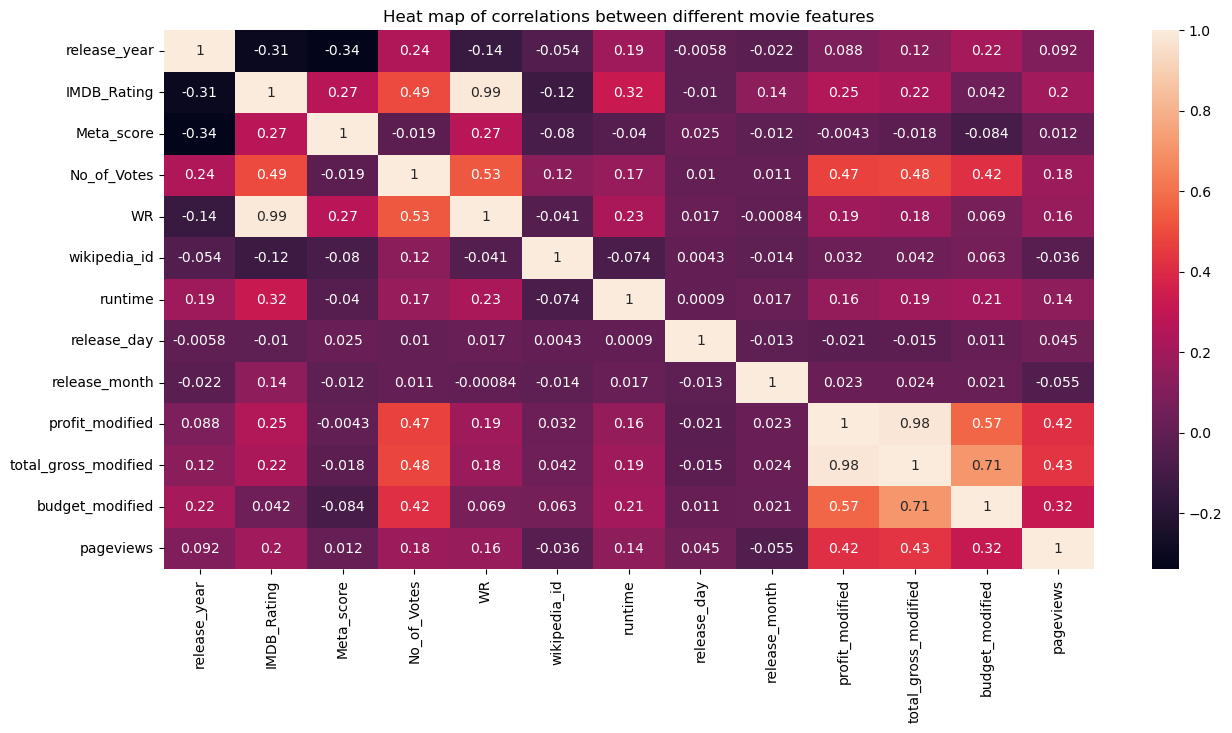

In [753]:
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(df_all.corr(), annot=True, ax=ax).set(title='Heat map of correlations between different movie features');


Interesting correlations: 
- Our different success indicators are not too correlated (WR, profit_modified) 
- There is a correlation betweenn number of votes and profit 

### Impact of release date on success

To assess the impact of release date on success, we need to use the information on 'release_month' for each movie and need to choose a feature for success which can be either the IMDB weighted rating 'WR' or the gross revenue.

In [754]:
print(f"Out of {df_all.shape[0]} movies in out dataset, we have the release month information for {df_all['release_month'].count()} movies which is a big enough dataset to be representative.")

Out of 83085 movies in out dataset, we have the release month information for 43858 movies which is a big enough dataset to be representative.


In [755]:
df_release = df_all.dropna(how='all', subset=['release_month']) # Remove NaN months

/Users/nstanishev/opt/anaconda3/envs/epfl-ada/lib/python3.9/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/Users/nstanishev/opt/anaconda3/envs/epfl-ada/lib/python3.9/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),


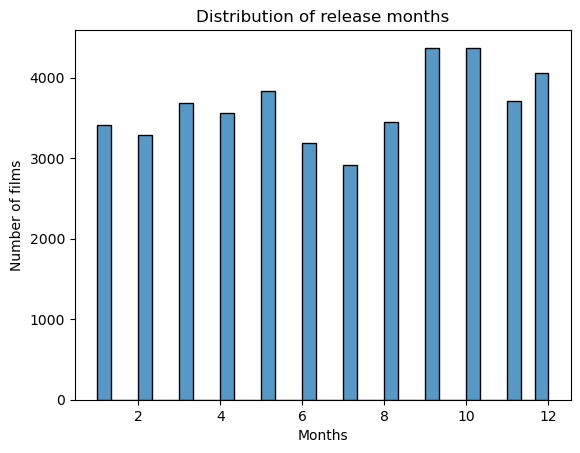

In [756]:
sns.histplot(x='release_month', data = df_release).set(title='Distribution of release months',xlabel='Months', ylabel='Number of films');

From the plot above, we can see that the distribution of release months is fairly homogeneous accross the data which allows to investigate success accross different release months.

In [757]:
df_release=df_release.sort_values(by='release_month', ascending=True)

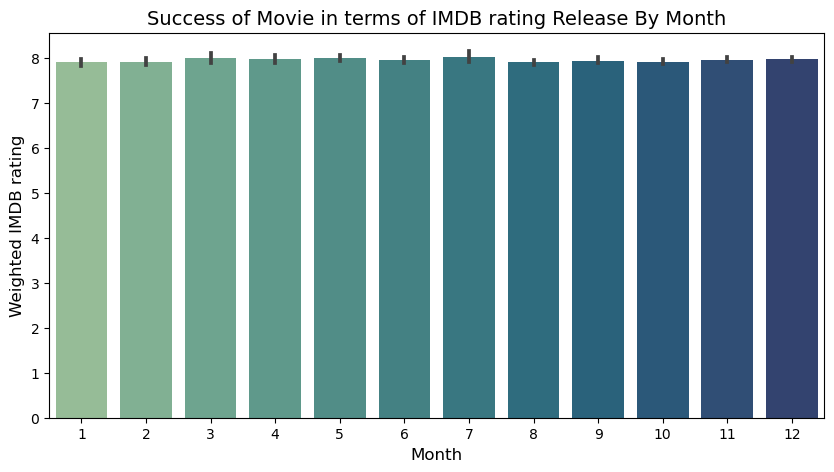

In [758]:
# Plot
plt.figure(figsize=(10,5));
ax = sns.barplot(x="release_month", y="WR",data=df_release,palette='crest');
plt.xlabel('Month', fontsize=12)
plt.ylabel('Weighted IMDB rating', fontsize=12)
plt.title('Success of Movie in terms of IMDB rating Release By Month', fontsize=14);

Text(0.5, 1.0, 'Success in terms of revenue of Movie Release By Month')

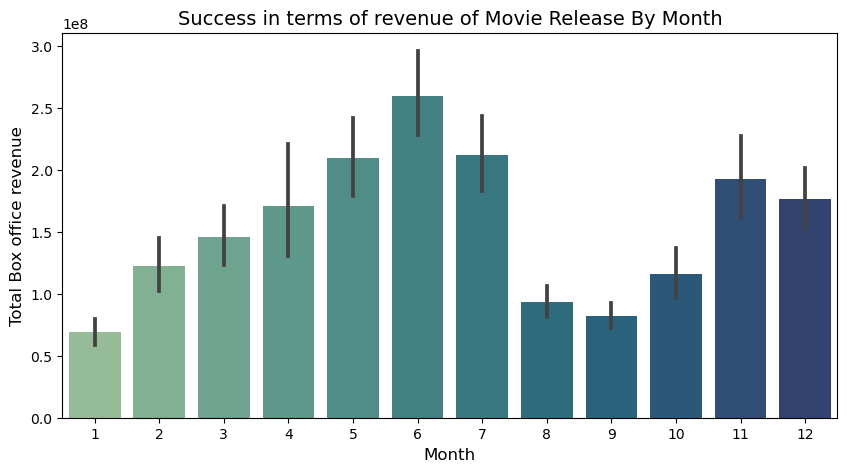

In [759]:
# Plot
plt.figure(figsize=(10,5))
ax = sns.barplot(x="release_month", y="total_gross_modified",data=df_release,palette='crest')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Box office revenue', fontsize=12)
plt.title('Success in terms of revenue of Movie Release By Month', fontsize=14)

As we can see from the results above, the movie weighted ratings are not at all influenced by the release period. However, the gross revenue is. We see that movies released in summer and in the end of the year are more successful.  Since the distribution of movies is fairly the same across our dataset, we can deduce that these periods are more favourable for movie release. It interesting to note that these results coincide with usual holidays periods where people have more time to go to the cinema. 

## What budget should be spent on a successful movie?

To see what budget should be spent on a successful movie, we want to compare mainly three features, the budget spent 'Production Budget', the profit made 'profit' and the weighted rating of the movie to account for successfulness 'WR'.


In [760]:
print(f"Out of {df_all.shape[0]} movies in out dataset, we have the profit information for {df_all['profit_modified'].count()} movies, total gross revenue information for {df_all['total_gross_modified'].count()} movies , budget information for {df_all['budget_modified'].count()} movies.")


Out of 83085 movies in out dataset, we have the profit information for 3841 movies, total gross revenue information for 3841 movies , budget information for 3841 movies.


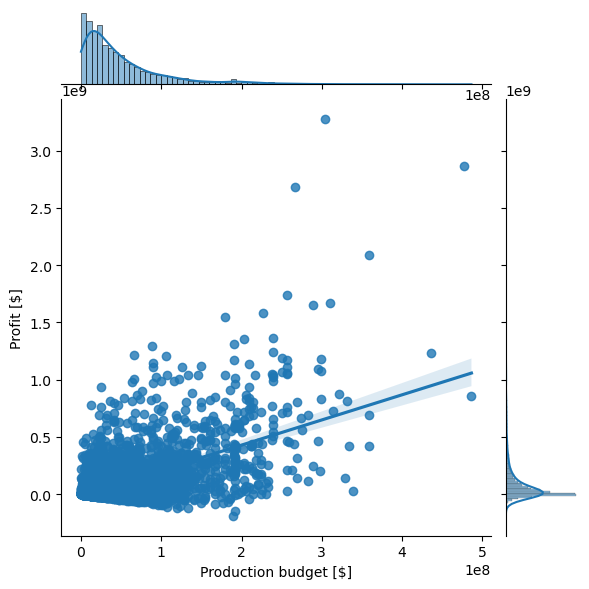

In [761]:
h = sns.jointplot(data=df_all, x='budget_modified', y='profit_modified', kind="reg");
h.ax_joint.set_xlabel('Production budget [$]');
h.ax_joint.set_ylabel('Profit [$]');

As we can see from the plot above, the positive trend line indicates that an increase in the budget will result in an increase in profit. However, there seems to be a lot of outliers. For our datastory (Milestone 3), it would be interesting to split this into two categories, high budget movies and average movies. Additionnaly, we will want to investigate if this budget trend is different across genres.

To compare the link between all three features, we build the pairplot below:

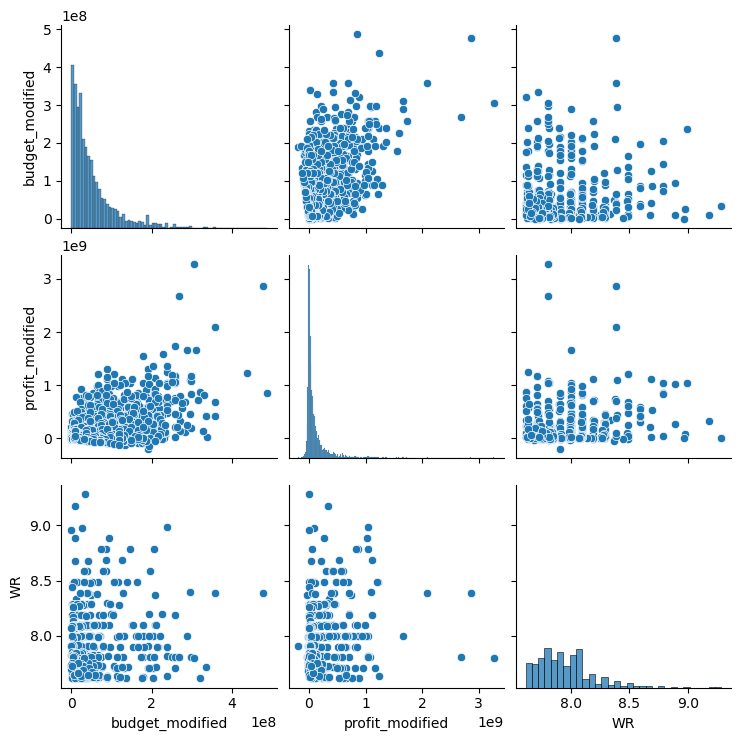

In [762]:
sns.pairplot(movie_feature_with_budget[['budget_modified','profit_modified','WR']]);

### Top 20 most profitable movies

In [763]:
Top20_ProfitableMovies = df_all.sort_values('profit_modified', ascending=False).head(20)

/var/folders/m_/fhwnh1jn04qgx3nmt22_5h340000gn/T/ipykernel_34242/3285713744.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=Top20_ProfitableMovies['name'],y=Top20_ProfitableMovies['profit_modified'],
/var/folders/m_/fhwnh1jn04qgx3nmt22_5h340000gn/T/ipykernel_34242/3285713744.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=Top20_ProfitableMovies['name'],y=Top20_ProfitableMovies['budget_modified'],


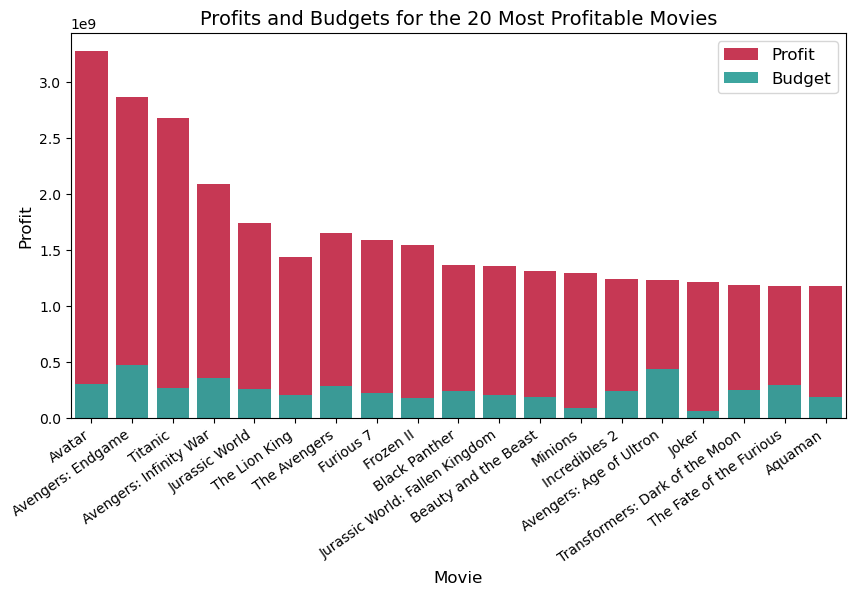

In [764]:
plt.figure(figsize=(10,5))
sns.barplot(x=Top20_ProfitableMovies['name'],y=Top20_ProfitableMovies['profit_modified'], 
            color='crimson', alpha=0.95, label='Profit', ci=None)
sns.barplot(x=Top20_ProfitableMovies['name'],y=Top20_ProfitableMovies['budget_modified'], 
            color='lightseagreen', alpha=0.95, label='Budget', ci=None)
plt.xlabel('Movie', fontsize=12)
plt.title("Profits and Budgets for the 20 Most Profitable Movies", fontsize=14)
plt.ylabel('Profit', fontsize=12)
plt.xticks(rotation=35, horizontalalignment='right', fontsize=10)
plt.legend(fontsize=12)

## Impact of director

In [765]:
print(f"Out of {df_all.shape[0]} movies in out dataset, we have the director information for {df_all['Director'].count()} movies coming from the top 1000 IMDB data set.")

Out of 83085 movies in out dataset, we have the director information for 1000 movies coming from the top 1000 IMDB data set.


In [766]:
df_director = df_all.dropna(how='all', subset=['Director']) # Remove NaN directors

In [767]:
Top20_ProfitableMovies = df_director.sort_values('profit_modified', ascending=False).head(20)

/var/folders/m_/fhwnh1jn04qgx3nmt22_5h340000gn/T/ipykernel_34242/3768242461.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=Top20_ProfitableMovies['Director'],y=Top20_ProfitableMovies['profit_modified'],
/var/folders/m_/fhwnh1jn04qgx3nmt22_5h340000gn/T/ipykernel_34242/3768242461.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=Top20_ProfitableMovies['Director'],y=Top20_ProfitableMovies['budget_modified'],


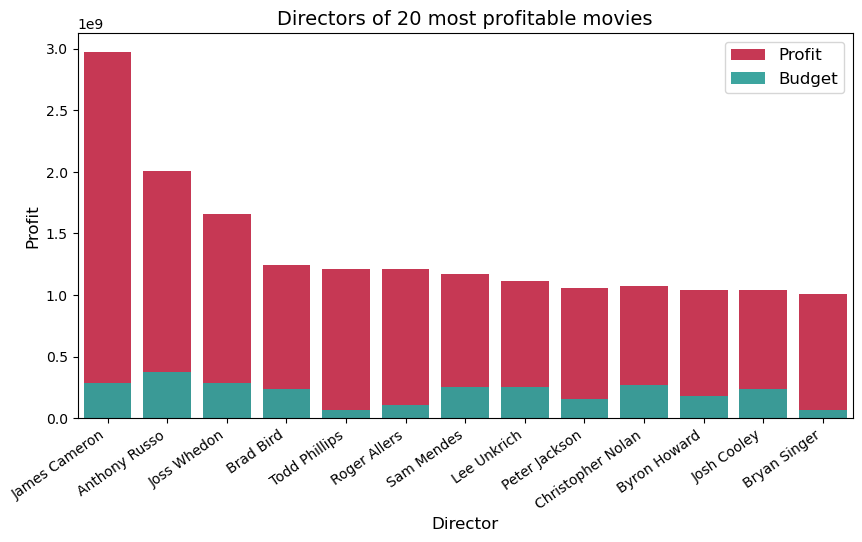

In [768]:
plt.figure(figsize=(10,5))
sns.barplot(x=Top20_ProfitableMovies['Director'],y=Top20_ProfitableMovies['profit_modified'], 
            color='crimson', alpha=0.95, label='Profit', ci=None)
sns.barplot(x=Top20_ProfitableMovies['Director'],y=Top20_ProfitableMovies['budget_modified'], 
            color='lightseagreen', alpha=0.95, label='Budget', ci=None)
plt.xlabel('Director', fontsize=12)
plt.title("Directors of 20 most profitable movies", fontsize=14)
plt.ylabel('Profit', fontsize=12)
plt.xticks(rotation=35, horizontalalignment='right', fontsize=10)
plt.legend(fontsize=12)

In [769]:
Top20_ProfitableMovies['Director']

623        James Cameron
59         Anthony Russo
652        James Cameron
60         Anthony Russo
357          Joss Whedon
891            Brad Bird
33         Todd Phillips
43          Roger Allers
751           Sam Mendes
151          Lee Unkrich
13         Peter Jackson
63     Christopher Nolan
583        Anthony Russo
618        Peter Jackson
2      Christopher Nolan
330         Byron Howard
596          Josh Cooley
10         Peter Jackson
5          Peter Jackson
342         Bryan Singer
Name: Director, dtype: object

## Impact of actors

In [770]:
print(f"Out of {df_all.shape[0]} movies in out dataset, we have the 1st actor information for {df_all['Star1'].count()} movies coming from the top 1000 IMDB data set.")

Out of 83085 movies in out dataset, we have the 1st actor information for 1000 movies coming from the top 1000 IMDB data set.


For now, we only consider the main actor of a movie but this can be extrapolated to all actors accross multiple movies for our next milestone. 

In [771]:
df_main_actor = df_all.dropna(how='all', subset=['Star1']) # Remove NaN actors

In [772]:
Top20_ProfitableMovies = df_main_actor.sort_values('profit_modified', ascending=False).head(20)

/var/folders/m_/fhwnh1jn04qgx3nmt22_5h340000gn/T/ipykernel_34242/629570327.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=Top20_ProfitableMovies['Star1'],y=Top20_ProfitableMovies['profit_modified'],
/var/folders/m_/fhwnh1jn04qgx3nmt22_5h340000gn/T/ipykernel_34242/629570327.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=Top20_ProfitableMovies['Star1'],y=Top20_ProfitableMovies['budget_modified'],


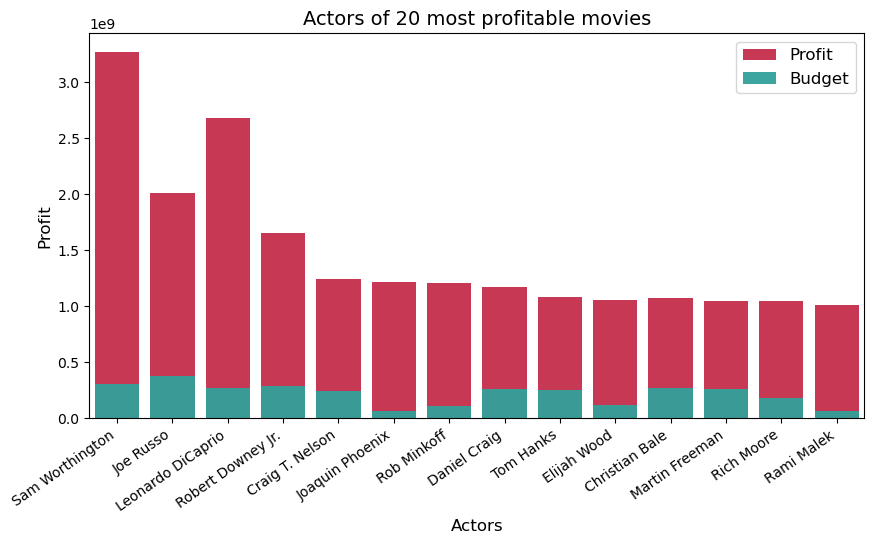

In [773]:
plt.figure(figsize=(10,5))
sns.barplot(x=Top20_ProfitableMovies['Star1'],y=Top20_ProfitableMovies['profit_modified'], 
            color='crimson', alpha=0.95, label='Profit', ci=None)
sns.barplot(x=Top20_ProfitableMovies['Star1'],y=Top20_ProfitableMovies['budget_modified'], 
            color='lightseagreen', alpha=0.95, label='Budget', ci=None)
plt.xlabel('Actors', fontsize=12)
plt.title("Actors of 20 most profitable movies", fontsize=14)
plt.ylabel('Profit', fontsize=12)
plt.xticks(rotation=35, horizontalalignment='right', fontsize=10)
plt.legend(fontsize=12)

For our datastory, the goal would be to cluster actors accross genres. That way, we can forecast which actor would be best to select for a particular genre to boost success.

## Popular features in characters

The characters table is splitted between actors and actresses to study each gender as a whole different group.

In [774]:
characters_male = characters[characters['actor_gender'] == 'M']
characters_female = characters[characters['actor_gender'] == 'F']

The following plot presents the height distribution for the actors and actresses. We can see that men tend to be taller than women actors. Also, it can be seen that in the dataset there are way more men than women

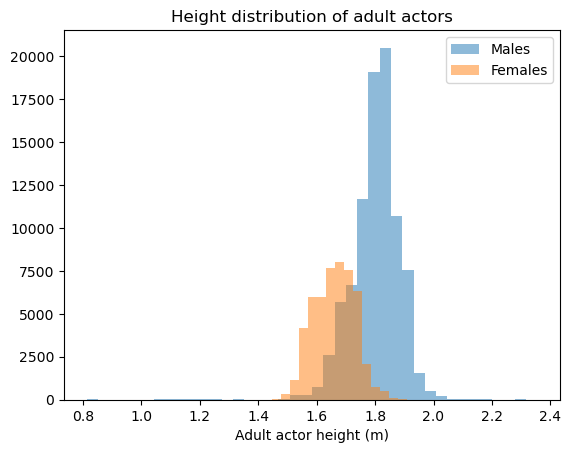

In [775]:
def filter_children(characters):
    LIMIT_CHILDREN_AGE = 14
    return characters[(characters['actor_age_at_movie_release'] > LIMIT_CHILDREN_AGE)]

def characters_height_histogram(characters, bins):
    characters_height = characters.dropna(subset=['actor_height_meters'])
    plt.hist(characters_height['actor_height_meters'],bins=bins, alpha=0.5)
    plt.legend(['Males', 'Females'])
    plt.xlabel('Adult actor height (m)')
    plt.title('Height distribution of adult actors')

characters_height_histogram(filter_children(characters_male), bins=40)
characters_height_histogram(filter_children(characters_female), bins=25)


Another important characteristic we can study is the age on movie release. Again, there is a huge difference between women and men. Women play roles when they are younger, while men seem to have longer careers.

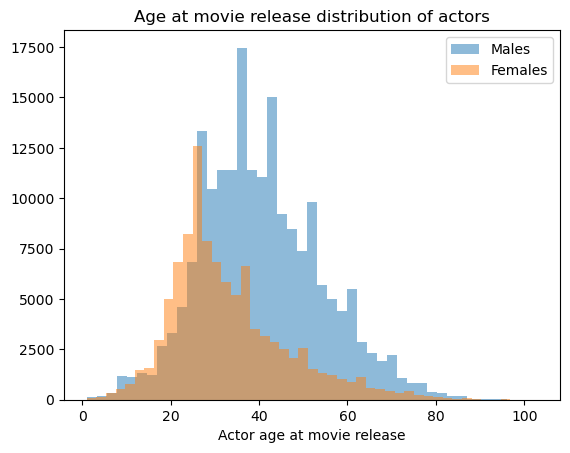

In [776]:
def characters_age_histogram(characters):
    characters_age = characters.dropna(subset=['actor_age_at_movie_release']).sort_values(by=['actor_age_at_movie_release'])
    characters_age = characters_age[characters_age['actor_age_at_movie_release'] > 0]
    plt.hist(characters_age['actor_age_at_movie_release'], bins=45, alpha=0.5)
    plt.legend(['Males', 'Females'])
    plt.xlabel('Actor age at movie release')
    plt.title('Age at movie release distribution of actors')

characters_age_histogram(characters_male)
characters_age_histogram(characters_female)

The following plot shows the ethnicity distribution for actors and actresses of the dataset. It can be seen how white people clearly dominate the characters dataset by more than a half of it. Indians are also a big group representing 1/4 of the ethnicities. In this case, the difference between genders is not that big.

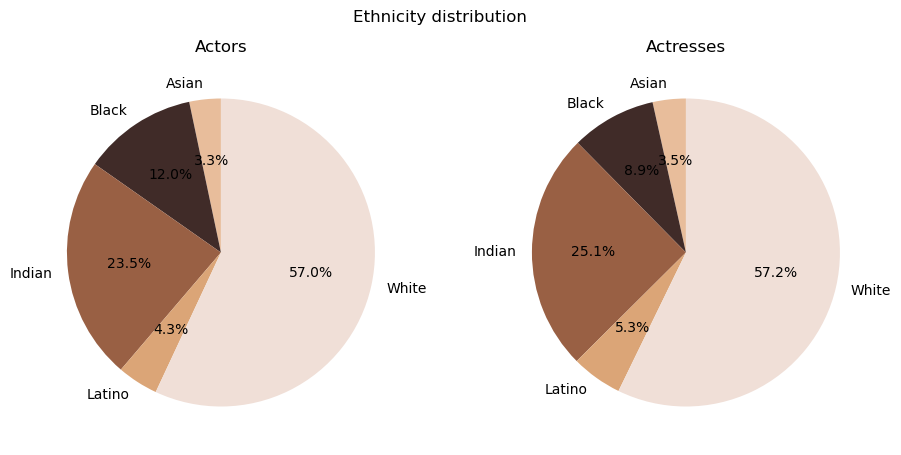

In [777]:
def pie_chart_actor_ethnicities(actors, title, ax):
    actors_ethnicity = actors.dropna(subset=['major_ethnicity'])
    actors_ethnicity = actors_ethnicity[actors_ethnicity['major_ethnicity'] != 'unknown']
    ethnicities, counts = np.unique(actors_ethnicity['major_ethnicity'], return_counts=True)
    #print(np.sort(counts))
    others_count = 0
    plot_ethnicities = []
    plot_counts = []
    ETHNICITY_THRESHOLD = 1
    for ethnicity, count in zip(ethnicities, counts):
        if count > ETHNICITY_THRESHOLD:
            plot_ethnicities.append(ethnicity)
            plot_counts.append(count)
        else:
            others_count += count

    colors = ['#e8bd9b','#402b28','#996044','#dba577','#f0dfd7']

    ax.pie(plot_counts, labels=plot_ethnicities, startangle=90,autopct='%1.1f%%',colors=colors, radius=1)
    ax.set_title(title)

def two_pie_charts_actor_ethnicities(actors1, actors2, title, title1, title2):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_facecolor('white')
    fig.set_size_inches(11, 5)
    fig.suptitle(title)

    pie_chart_actor_ethnicities(actors1, title1, ax1)
    pie_chart_actor_ethnicities(actors2, title2, ax2)
    plt.show()


two_pie_charts_actor_ethnicities(characters_male, 
                                 characters_female, 
                                 title='Ethnicity distribution', 
                                 title1='Actors', 
                                 title2='Actresses')

The next plot shows the number of different ethnicities per movie. For instance, a movie that includes at least one Indian and one Black actress has 2 different ethnicities. As we can see, the vast majority of the films only have one ethnicity on it.

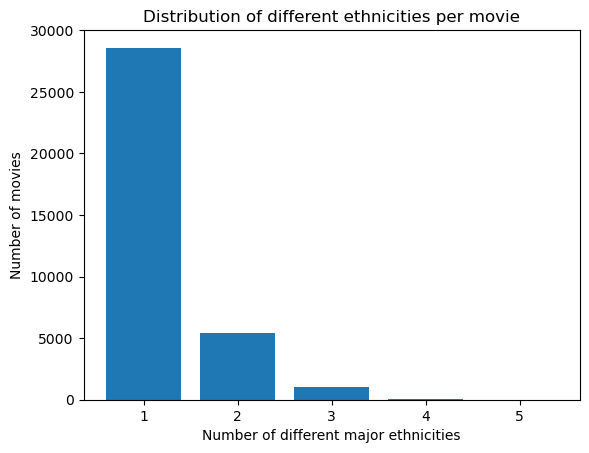

In [778]:
def plot_different_ethnicities_per_movie(characters):
    ethnicity_characters = characters.dropna(subset=['major_ethnicity'])
    num_different_ethnicities = ethnicity_characters.groupby(by=['freebase_movie_id'])['major_ethnicity'].nunique()
    num_ethnicies, count = np.unique(num_different_ethnicities, return_counts=True)
    plt.bar(num_ethnicies, count)
    plt.xlabel('Number of different major ethnicities')
    plt.ylabel('Number of movies')
    plt.title('Distribution of different ethnicities per movie')
plot_different_ethnicities_per_movie(characters)

Since now, we have been working using all the characters in the dataset, even if the same actor played more than one. Now, let's focus on actors instead of characters to figure out the success associated to the professional. First we create an actors dataset. We also compute in how many films in the dataset the actor appears, this value can be found in the column `num_movies`

In [779]:
actors = characters[['freebase_actor_id', 'freebase_movie_id', 'actor_name', 'actor_gender', 'actor_height_meters', 'ethnicity_label', 'major_ethnicity']]
actors = actors.dropna(subset=['freebase_actor_id'])
actors['num_movies'] = actors.groupby(by=['freebase_actor_id'])['freebase_actor_id'].transform('size')
actors.drop('freebase_movie_id', axis=1, inplace=True)
actors.drop_duplicates(subset=['freebase_actor_id'], inplace=True)
actors.head(5)

,freebase_actor_id,actor_name,actor_gender,actor_height_meters,ethnicity_label,major_ethnicity,num_movies
0,/m/03wcfv7,Wanda De Jesus,F,1.620,NaN,NaN,8
1,/m/0346l4,Natasha Henstridge,F,1.780,unknown,NaN,23
2,/m/01vw26l,Ice Cube,M,1.727,African Americans,Black,33
3,/m/034hyc,Jason Statham,M,1.750,NaN,NaN,31
4,/m/01y9xg,Clea DuVall,F,1.650,NaN,NaN,31


Again, let's split actors in genders

In [780]:
actors_male = actors[actors['actor_gender'] == 'M']
actors_female = actors[actors['actor_gender'] == 'F']

And now we can focus on the actors that have appeared in a greater number of movies. We fix this threshold at 15 movies.

In [781]:
def get_most_demanded_actors(actors, min_num_movies):
    return actors[actors['num_movies'] >= min_num_movies]

MIN_NUM_MOVIES_DEMANDED_ACTOR = 15
demanded_actors_male = get_most_demanded_actors(actors_male, MIN_NUM_MOVIES_DEMANDED_ACTOR)
demanded_actors_female = get_most_demanded_actors(actors_female, MIN_NUM_MOVIES_DEMANDED_ACTOR)


This way, we can compare if the most characteristic features of each actor are the same for the whole dataset of characters. We are plotting again the height distribution both for males and females.

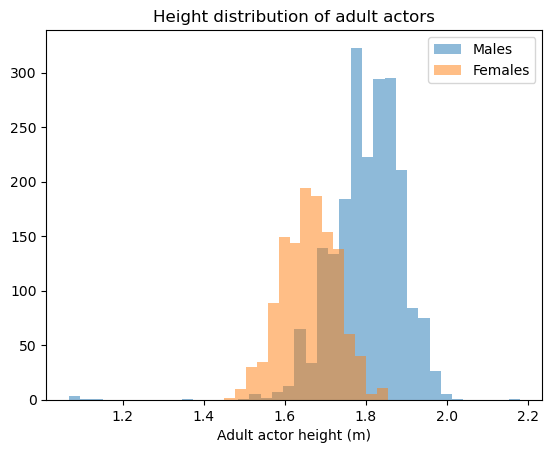

In [782]:
characters_height_histogram(demanded_actors_male, 40)
characters_height_histogram(demanded_actors_female, 15)

Also, the ethnicities are plotted again. We can observe that discriminations are even bigger.

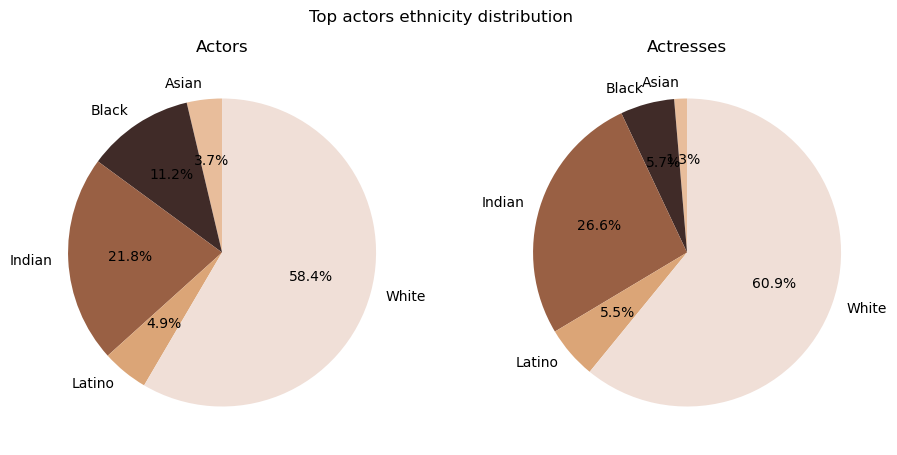

In [783]:
two_pie_charts_actor_ethnicities(demanded_actors_male, 
                                 demanded_actors_female, 
                                 title='Top actors ethnicity distribution', 
                                 title1='Actors', 
                                 title2='Actresses')

All these data about characters is going to be merged and analysed for the last milestone. By now, we have demonstrated that we have data enough to work and answer the proper questions

## What genres are the most profitable?

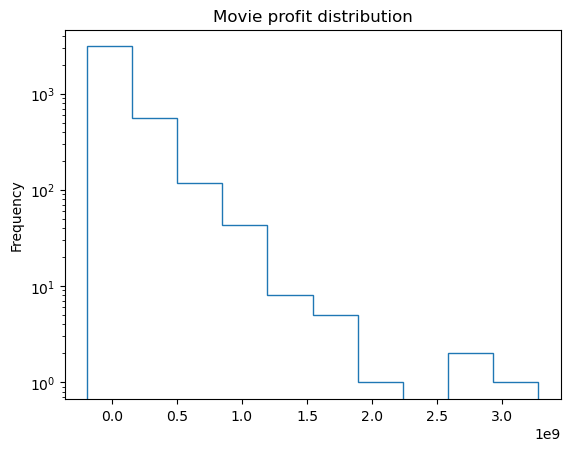

In [784]:
df_all['profit_modified'].plot(kind='hist', logy=True, histtype='step', title='Movie profit distribution');

In [785]:
df_all['genre']

0        [Crime Fiction, Buddy film, Prison film, Drama...
1        [Crime Fiction, Gangster Film, Crime Drama, Fa...
2        [Crime Fiction, Thriller, Superhero movie, Cri...
3                                           [Crime, Drama]
4                                                  [Drama]
                               ...                        
83080                                   [Horror, Thriller]
83081                         [Adventure, Fantasy, Horror]
83082                              [Crime, Drama, Mystery]
83083                       [Animation, Action, Adventure]
83084                          [Biography, Drama, History]
Name: genre, Length: 83085, dtype: object

In [786]:
df_all['genre1'] = df_all['genre'].apply(lambda el: el[0])

In [787]:
df_genre = df_all[df_all['genre1'] != '']

In [788]:
genres = df_genre['genre1'].value_counts()

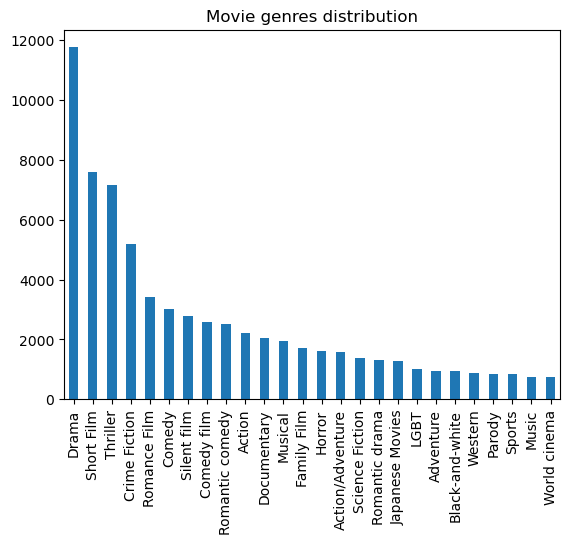

In [789]:
genres[genres > 700].plot(kind='bar', title='Movie genres distribution');

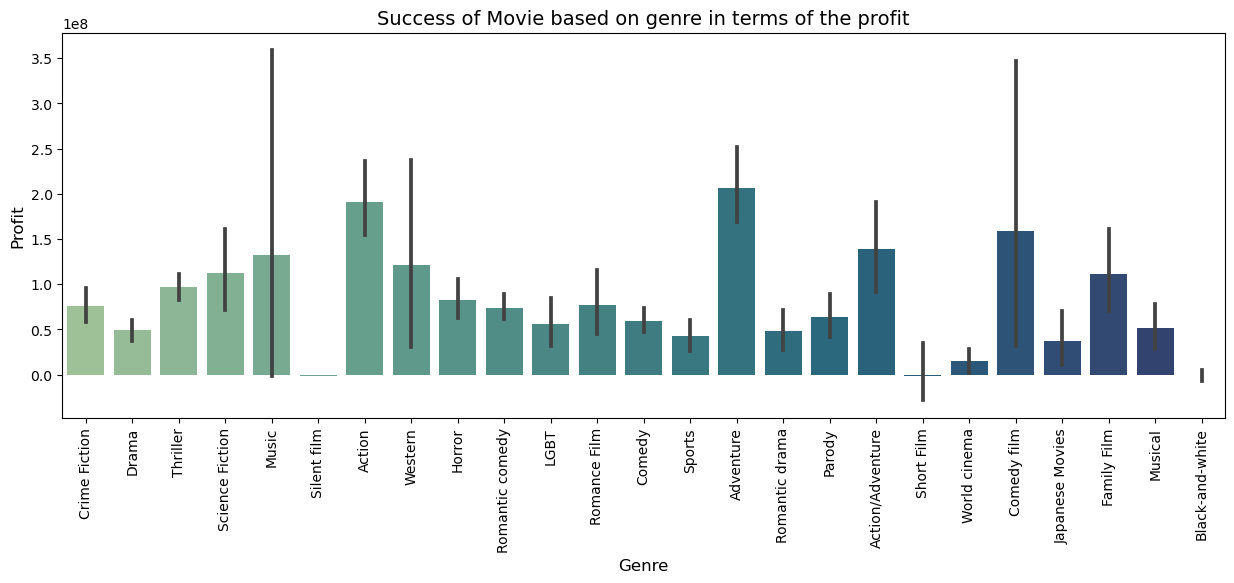

In [790]:
plt.figure(figsize=(15,5));
ax = sns.barplot(
    x="genre1",
    y="profit_modified",
    data=df_genre[df_genre['profit_modified'].notna() & df_genre['genre1'].isin(genres[genres > 700].index.to_list())],
    palette='crest'
)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Profit', fontsize=12)
plt.title('Success of Movie based on genre in terms of the profit', fontsize=14)
_ = plt.xticks(rotation=90)

## Correlation between the choice of topics and movie profitability can be investigated

In [791]:
df_all['genre1_category'] = df_all['genre1'].astype('category').cat.codes

/var/folders/m_/fhwnh1jn04qgx3nmt22_5h340000gn/T/ipykernel_34242/3979341198.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_all.corr(), annot=True, ax=ax).set(title='Heat map of correlations between different movie features');


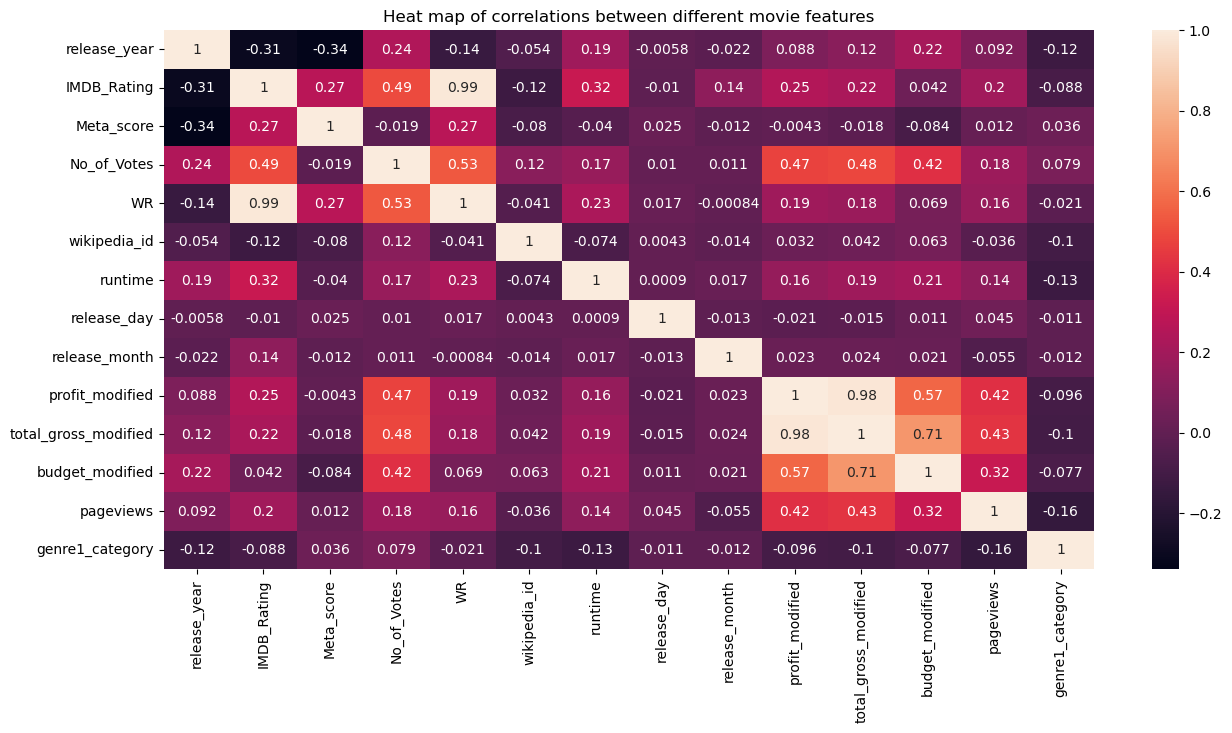

In [792]:
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(df_all.corr(), annot=True, ax=ax).set(title='Heat map of correlations between different movie features');

## Clustering between movies: Classics VS forgettable : check with wikipedia ID how much it is visited : time series of access 

In [793]:
wikipedia_pageviews.sample(5)

,name,date,pageviews
1003240,Wanted,2016-09-10,42
2140607,Tower Heist,2017-11-03,1215
993152,The Godfather,2018-05-08,6454
497742,Wreck-It Ralph,2017-05-05,1357
1921134,Ferdinand,2016-12-18,91


<AxesSubplot:title={'center':'Pageviews for Spy Kids'}, xlabel='date'>

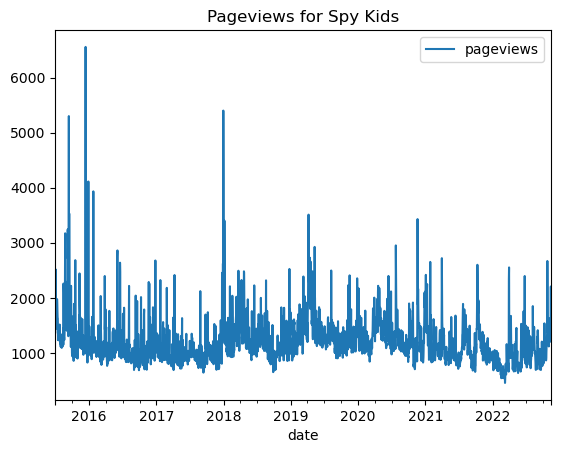

In [794]:
wikipedia_pageviews[wikipedia_pageviews['name'] == 'Spy Kids'].plot(x='date', y='pageviews', title='Pageviews for Spy Kids')

<AxesSubplot:title={'center':'Pageviews for Avengers: Endgame'}, xlabel='date'>

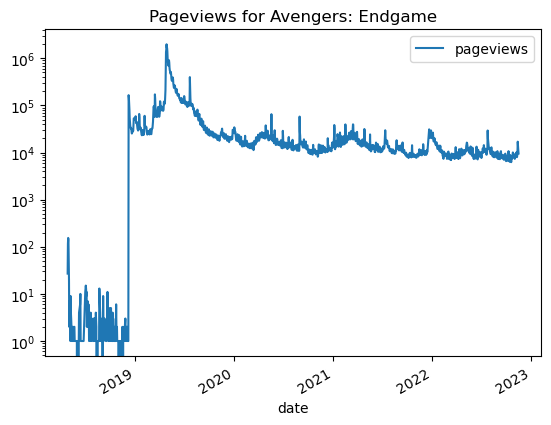

In [795]:
wikipedia_pageviews[wikipedia_pageviews['name'] == 'Avengers: Endgame'].plot(x='date', y='pageviews', logy=True, title='Pageviews for Avengers: Endgame')

In [796]:
df_all.sample(5)

,name,release_year,Certificate,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,...,countries,genre,release_day,release_month,profit_modified,total_gross_modified,budget_modified,pageviews,genre1,genre1_category
22341,Mallepuvu,2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,[India],"[Drama, Bollywood, World cinema]",<NA>,<NA>,NaN,NaN,NaN,NaN,Drama,93
72153,The Prophet of Hunger,1970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,[Brazil],[Drama],<NA>,<NA>,NaN,NaN,NaN,NaN,Drama,93
72519,Payum Puli,2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,[India],[Family Film],<NA>,<NA>,NaN,NaN,NaN,NaN,Family Film,115
38165,Adam Resurrected,2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"[United States of America, Israel, Germany]","[Period piece, War film, Drama, Film adaptation]",12,12,NaN,NaN,NaN,NaN,Period piece,206
13177,Patient X,2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,[Philippines],"[Romantic drama, Horror, Filipino Movies, Worl...",<NA>,<NA>,NaN,NaN,NaN,NaN,Romantic drama,236


In [797]:
df_all.columns

Index(['name', 'release_year', 'Certificate', 'IMDB_Rating', 'Overview',
       'Meta_score', 'Director', 'Star1', 'Star2', 'Star3', 'Star4',
       'No_of_Votes', 'WR', 'wikipedia_id', 'freebase_id', 'runtime',
       'languages', 'countries', 'genre', 'release_day', 'release_month',
       'profit_modified', 'total_gross_modified', 'budget_modified',
       'pageviews', 'genre1', 'genre1_category'],
      dtype='object')

In [798]:
mod = smf.ols(formula='pageviews ~ runtime + Certificate + IMDB_Rating + No_of_Votes + total_gross_modified + profit_modified + genre1', data=df_all[df_all['release_year'] < (2015-15)])
np.random.seed(2)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              pageviews   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                 -0.341
Method:                 Least Squares   F-statistic:                    0.5519
Date:                Sat, 03 Dec 2022   Prob (F-statistic):              0.957
Time:                        11:07:25   Log-Likelihood:                -604.28
No. Observations:                  68   AIC:                             1287.
Df Residuals:                      29   BIC:                             1373.
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                              2.798e+04   2.17e+04      1.290      0.207   -1.64e+04    7.23e+04
Certificate[T.Approved]                  -0.0284      0.023     -1.215      0.234      -0.076       0.019
Certificate[T.G]                        329.6209   2337.930      0.141      0.889   -4451.983    5111.225
Certificate[T.GP]                        -0.0025      0.002     -1.251      0.221      -0.007       0.002
Certificate[T.M/PG]                      -0.0055      0.004     -1.258      0.219      -0.015       0.003
Certificate[T.NC-17]                     -0.0020      0.001     -1.418      0.167      -0.005       0.001
Certificate[T.Not Rated]                 -0.0203      0.017     -1.176      0.249      -0.056       0.015
Certificate[T.PG]                      -473.5713   4224.958     -0.112      0.912   -9114.581    8167.438
Certificate[T.PG-13]                    119.6337   3529.459      0.034      0.973   -7098.919    7338.187
Certificate[T.Passed]                   786.0908   1555.580      0.505      0.617   -2395.427    3967.609
Certificate[T.R]                         26.4209   2235.719      0.012      0.991   -4546.138    4598.980
Certificate[T.TV-PG]                     -0.0161      0.011     -1.523      0.139      -0.038       0.006
Certificate[T.U]                       -268.8006   1305.403     -0.206      0.838   -2938.650    2401.048
Certificate[T.UA]                       625.3857   1913.411      0.327      0.746   -3287.978    4538.750
Certificate[T.Unrated]                   -0.0151      0.011     -1.437      0.161      -0.037       0.006
genre1[T.Absurdism]                      -0.0114      0.008     -1.369      0.182      -0.028       0.006
genre1[T.Action]                       1645.8872   3105.705      0.530      0.600   -4705.993    7997.767
genre1[T.Action Comedy]               -1.435e-11   1.13e-11     -1.272      0.213   -3.74e-11    8.72e-12
genre1[T.Action Thrillers]            -1.231e-11   1.07e-11     -1.148      0.260   -3.42e-11    9.62e-12
genre1[T.Action/Adventure]              7.23e-12   4.59e-12      1.575      0.126   -2.16e-12    1.66e-11
genre1[T.Addiction Drama]             -8.859e-13   1.89e-12     -0.468      0.643   -4.76e-12    2.98e-12
genre1[T.Adult]                        3.468e-12   5.12e-12      0.677      0.503      -7e-12    1.39e-11
genre1[T.Adventure]                     442.0673   1588.394      0.278      0.783   -2806.564    3690.699
genre1[T.Adventure Comedy]             3.772e-12    5.4e-12      0.698      0.490   -7.27e-12    1.48e-11
genre1[T.Airplanes and airports]       3.912e-12   5.82e-12      0.672      0.507   -7.99e-12    1.58e-11
genre1[T.Albino bias]                  2.945e-12   2.99e-12      0.986      0.332   -3.16e-12    9.05e-12
genre1[T.

## Countries

In [799]:
# sort by country
import json
movies_header = ['wikipedia_id', 'freebase_id', 'name', 'release_date', 'box_office_revenue', 'runtime', 'languages', 'countries', 'genres']
movies = pd.read_csv('data/movie.metadata.tsv', sep='\t', header=None, names=movies_header)
data = pd.read_csv('data/movie.metadata.tsv', sep='\t', header=None, names=movies_header)
movies.head(5)
print(movies.shape)
# movies=movies['countries'].apply(lambda row: len((eval(row).values())))
movies=movies['countries'].apply(lambda row: (eval(row).values()))
movies= pd.DataFrame(movies,columns=['countries'])
# movies['countries'].apply(len)
# movies.describe()
movies.head()


(81741, 9)


,countries
0,(United States of America)
1,(United States of America)
2,(Norway)
3,(United Kingdom)
4,(Germany)


In [800]:


# movies=movies['countries'].apply(lambda row: (eval(row).values()))
# movies= pd.DataFrame(movies,columns=['countries'])
exploded=pd.DataFrame([[c] for C in movies['countries'] for c in C],columns=['countries'])
len(exploded['countries'].unique())
count=exploded['countries'].value_counts()
count.to_csv('test.csv')
# US=movies['countries'].apply(lambda lis : "United States of America" in lis and len(lis)==1)
US=movies['countries'].apply(lambda lis : "United States of America" in lis)
US_movies=data.loc[US]
print('number of movies made in the US: ',US.sum())
IN=movies['countries'].apply(lambda lis : "India" in lis)
IN_movies=movies[IN]
print('number of movies made in india: ',IN.sum())

mult=movies['countries'].apply(lambda lis : len(lis)>1)
print('number of movies made in more than one country: ',sum(mult))


number of movies made in the US:  34408
number of movies made in india:  8411
number of movies made in more than one country:  9218


In [801]:

# one list with all the countries of all the movies
exploded=pd.DataFrame([[c] for C in movies['countries'] for c in C],columns=['countries'])
len(exploded['countries'].unique())
count=exploded['countries'].value_counts()
count.to_csv('handled_data/test.csv')


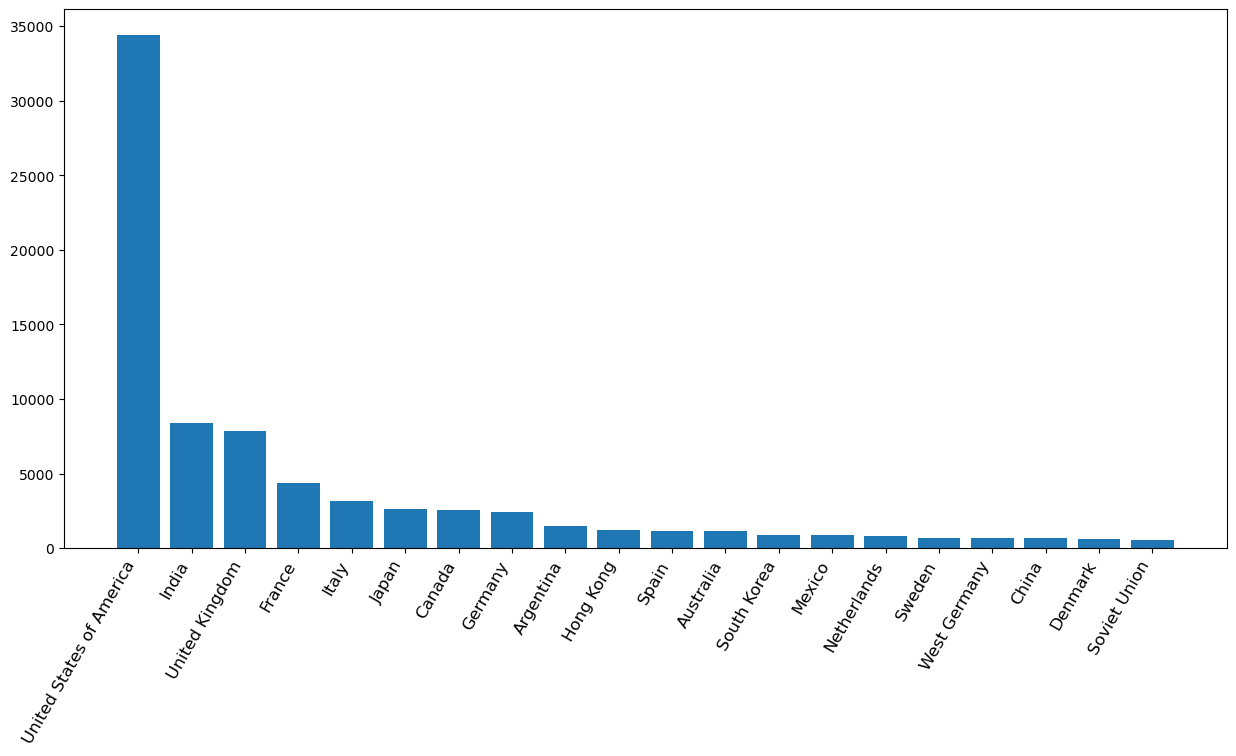

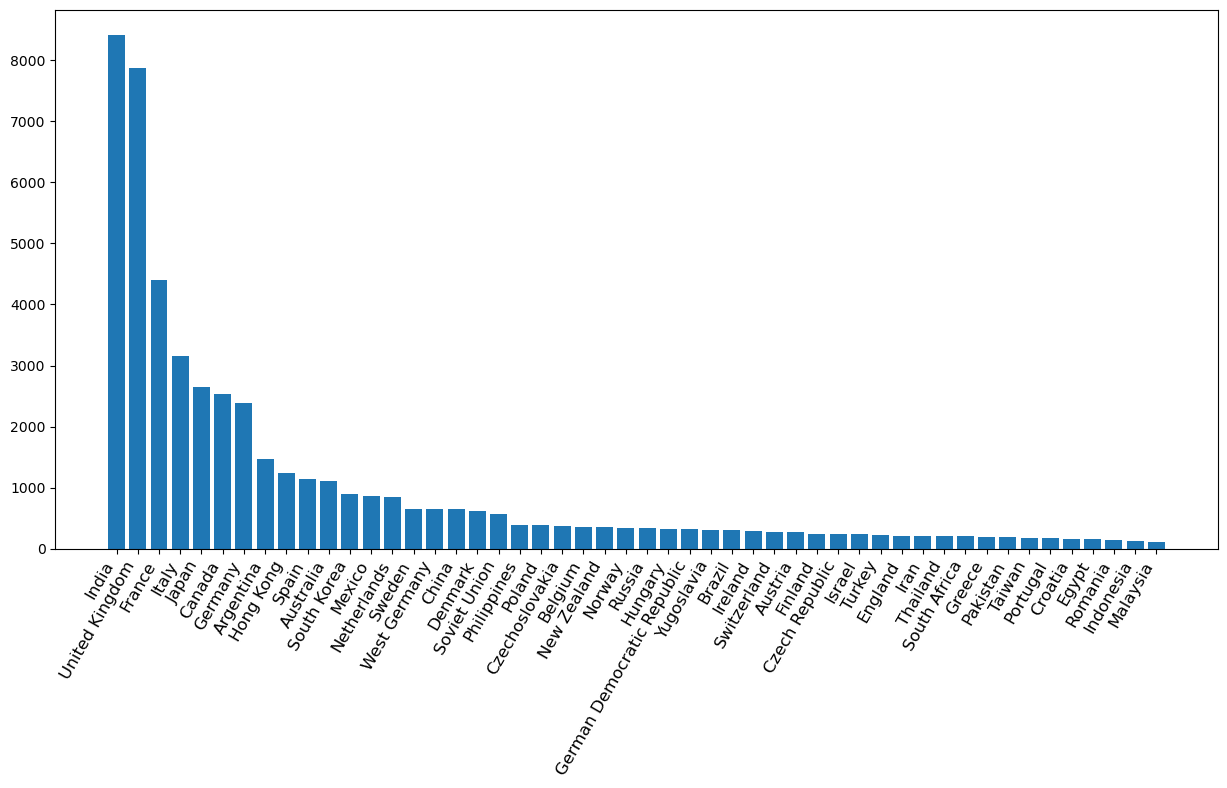

In [802]:



from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(15,7))
plt.bar(count.head(20).index.to_series(),count.head(20))
plt.xticks(rotation=60, horizontalalignment='right', fontsize=12);
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(15,7))
plt.bar(count[1:51].index.to_series(),count[1:51])
plt.xticks(rotation=60, horizontalalignment='right', fontsize=12);


In [803]:


# sort movies by date 
data[(data['release_date']<'2000') & (data['release_date']>='1995')]
set1=data[data['release_date']<'1985']
set2=data[data['release_date']>'1985']
set1=set1['countries']
set2=set2['countries']
def analysis(set) :
    set=set.apply(lambda row: (eval(row).values()))
    set= pd.DataFrame(set,columns=['countries'])
    exploded=pd.DataFrame([[c] for C in set['countries'] for c in C],columns=['countries'])
    # len(exploded['countries'].unique())
    count=exploded['countries'].value_counts()
    count.to_csv('test.csv')
    return count

c1=analysis(set1)
c2=analysis(set2)


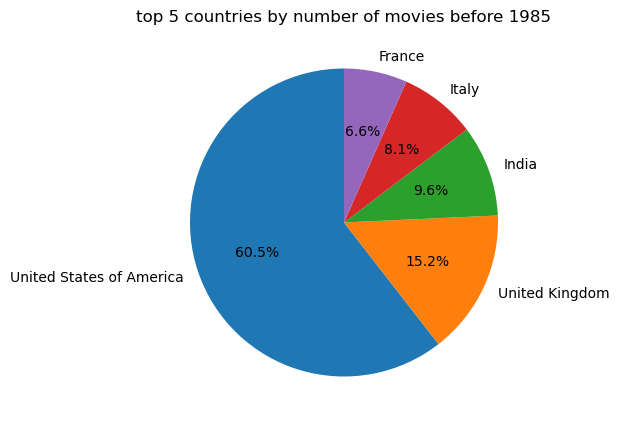

In [804]:
fig, ax = plt.subplots(figsize=(11,5))
# fig.set_facecolor('white')
# fig.set_size_inches(11, 5)
# fig.suptitle('title')
plot_counts=c1.head(5)
plot_countries=plot_counts.index.to_series()
ax.pie(plot_counts, labels=plot_countries, startangle=90,autopct='%1.1f%%', radius=1)
ax.set_title('top 5 countries by number of movies before 1985')
plt.show()
# plot_countries


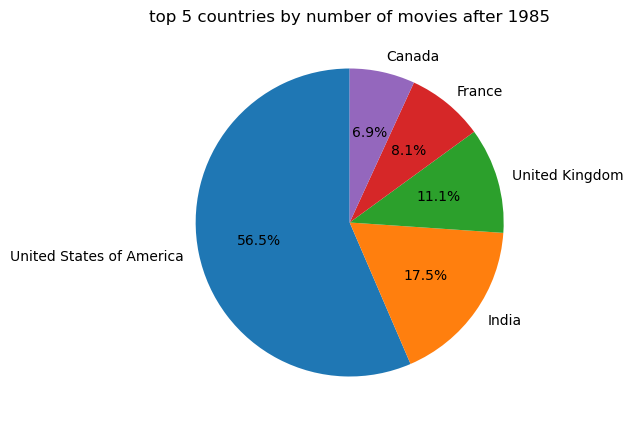

In [805]:

fig, ax = plt.subplots(figsize=(11,5))
# fig.set_facecolor('white')
# fig.set_size_inches(11, 5)
# fig.suptitle('title')
plot_counts=c2.head(5)
plot_countries=plot_counts.index.to_series()
ax.pie(plot_counts, labels=plot_countries, startangle=90,autopct='%1.1f%%', radius=1)
ax.set_title('top 5 countries by number of movies after 1985')
plt.show()

In [1007]:
df_all['name'].to_csv('./handled_data/movie_names.csv', index=False)

# Train NN for predicting revenue

In [806]:
df_all.columns

Index(['name', 'release_year', 'Certificate', 'IMDB_Rating', 'Overview',
       'Meta_score', 'Director', 'Star1', 'Star2', 'Star3', 'Star4',
       'No_of_Votes', 'WR', 'wikipedia_id', 'freebase_id', 'runtime',
       'languages', 'countries', 'genre', 'release_day', 'release_month',
       'profit_modified', 'total_gross_modified', 'budget_modified',
       'pageviews', 'genre1', 'genre1_category'],
      dtype='object')

In [807]:
movies_with_revenue = df_all[df_all['profit_modified'].notna()]

In [808]:
movies_with_revenue.describe()

,release_year,IMDB_Rating,Meta_score,No_of_Votes,WR,wikipedia_id,runtime,release_day,release_month,profit_modified,total_gross_modified,budget_modified,pageviews,genre1_category
count,3841.0,3841.000000,437.000000,4.420000e+02,442.000000,2.791000e+03,3841.000000,3841.0,3841.0,3.841000e+03,3.841000e+03,3.841000e+03,897.000000,3841.000000
mean,2003.595418,6.458058,77.233410,4.385973e+05,7.952713,7.601767e+06,110.444285,15.697475,6.945847,1.020213e+08,1.529179e+08,5.089654e+07,1769.307526,141.956261
std,12.752035,0.995366,12.115858,3.818920e+05,0.285557,1.025321e+07,25.800444,8.415704,3.431196,2.116340e+08,2.471666e+08,5.498706e+07,2452.036827,104.414482
min,1925.0,1.500000,28.000000,2.672900e+04,7.614407,3.746000e+03,4.000000,1.0,1.0,-1.887276e+08,0.000000e+00,8.981700e+03,0.833333,0.000000
25%,1999.0,5.900000,70.000000,1.645065e+05,7.732619,6.896870e+05,96.000000,9.0,4.0,-4.548600e+05,2.182930e+07,1.411410e+07,167.152134,56.000000
50%,2006.0,6.500000,78.000000,3.387040e+05,7.902599,2.303174e+06,106.000000,16.0,7.0,3.032431e+07,6.537242e+07,3.288200e+07,1105.296475,114.000000
75%,2013.0,7.100000,86.000000,5.985482e+05,8.090418,1.161260e+07,120.000000,23.0,10.0,1.134429e+08,1.742373e+08,6.673500e+07,2230.265823,244.000000
max,2020.0,9.300000,100.000000,2.343110e+06,9.285691,3.721033e+07,1003.000000,31.0,12.0,3.274088e+09,3.578183e+09,4.862949e+08,37415.568125,294.000000


In [955]:
from tensorflow.python.keras.layers import Dense
from tensorflow.keras.layers import Normalization, LeakyReLU
from tensorflow.python.keras.models import Sequential

# from tensorflow.keras.metrics import Recall, Precision
# from tensorflow_addons.metrics import F1Score

In [810]:
# profit_modified ~ release_year, release_month Certificate, WR, Director, Star1, runtime, languages, countries, budget_modified, pageviews, genre1

In [811]:
movies_with_revenue.drop([
    'name', 'IMDB_Rating', 'Overview', 'Meta_score', 'No_of_Votes', 'wikipedia_id', 'freebase_id', 'release_day',
    'total_gross_modified', 'genre1', 'genre1_category'
], axis=1, inplace=True)

/var/folders/m_/fhwnh1jn04qgx3nmt22_5h340000gn/T/ipykernel_34242/2572595685.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_with_revenue.drop([


In [836]:
movies_with_revenue['Star'] = movies_with_revenue[['Star1', 'Star2', 'Star3', 'Star4']].values.tolist()
movies_with_revenue.drop(['Star1', 'Star2', 'Star3', 'Star4'], axis=1, inplace=True)

/var/folders/m_/fhwnh1jn04qgx3nmt22_5h340000gn/T/ipykernel_34242/1371635011.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_with_revenue['Star'] = movies_with_revenue[['Star1', 'Star2', 'Star3', 'Star4']].values.tolist()
/var/folders/m_/fhwnh1jn04qgx3nmt22_5h340000gn/T/ipykernel_34242/1371635011.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_with_revenue.drop(['Star1', 'Star2', 'Star3', 'Star4'], axis=1, inplace=True)


In [879]:
movies_with_revenue.head()

,release_year,Certificate,Director,WR,runtime,languages,countries,genre,release_month,profit_modified,budget_modified,pageviews,Star
0,1994,A,Frank Darabont,9.285691,142.0,[English],[United States of America],"[Crime Fiction, Buddy film, Prison film, Drama...",9,4.560750e+06,33367500.0,NaN,"[Tim Robbins, Morgan Freeman, Bob Gunton, Will..."
1,1972,A,Francis Ford Coppola,9.180931,177.0,"[Latin, Italian, Sicilian, English]",[United States of America],"[Crime Fiction, Gangster Film, Crime Drama, Fa...",3,3.353214e+08,8976100.0,8609.092022,"[Marlon Brando, Al Pacino, James Caan, Diane K..."
2,2008,UA,Christopher Nolan,8.988679,153.0,"[Standard Mandarin, English]","[United States of America, United Kingdom]","[Crime Fiction, Thriller, Superhero movie, Cri...",7,1.046680e+09,237373500.0,210.699072,"[Christian Bale, Heath Ledger, Aaron Eckhart, ..."
3,1974,A,Francis Ford Coppola,8.977178,202.0,NaN,NaN,"[Crime, Drama]",12,9.012835e+07,26448500.0,NaN,"[Al Pacino, Robert De Niro, Robert Duvall, Dia..."
4,1957,U,Sidney Lumet,8.963129,96.0,[English],[United States of America],[Drama],4,-4.235720e+05,423572.0,NaN,"[Henry Fonda, Lee J. Cobb, Martin Balsam, John..."


In [886]:
temp = movies_with_revenue.copy()

In [880]:
def one_hot_encoding_list(df, column_name, top_count):
    top = pd.Series([el for _list in df[column_name] for el in _list]).value_counts()[:top_count].index
    df[column_name] = df[column_name].apply(lambda _list: [el if el in top else 'Other' for el in _list])
    result = df.join(pd.get_dummies(df[column_name].apply(pd.Series).stack(), prefix=column_name).max(level=0))
    result.drop([column_name], axis=1, inplace=True)
    return result

In [891]:
def one_hot_encoding(df, column_name, top_count):
    top = df[column_name].value_counts()[:top_count].index
    df[column_name] = df[column_name].apply(lambda el: el if el in top else 'Other')
    result = df.join(pd.get_dummies(df[column_name], prefix=column_name).max(level=0))
    result.drop([column_name], axis=1, inplace=True)
    return result

In [881]:
movies_with_revenue['languages'] = movies_with_revenue['languages'].fillna('').apply(list)
movies_with_revenue['countries'] = movies_with_revenue['countries'].fillna('').apply(list)

/var/folders/m_/fhwnh1jn04qgx3nmt22_5h340000gn/T/ipykernel_34242/519570180.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_with_revenue['languages'] = movies_with_revenue['languages'].fillna('').apply(list)
/var/folders/m_/fhwnh1jn04qgx3nmt22_5h340000gn/T/ipykernel_34242/519570180.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_with_revenue['countries'] = movies_with_revenue['countries'].fillna('').apply(list)


In [882]:
movies_with_revenue = one_hot_encoding_list(movies_with_revenue, 'genre', 17)
movies_with_revenue = one_hot_encoding_list(movies_with_revenue, 'languages', 10)
movies_with_revenue = one_hot_encoding_list(movies_with_revenue, 'countries', 10)
movies_with_revenue = one_hot_encoding_list(movies_with_revenue, 'Star', 34)

movies_with_revenue = one_hot_encoding(movies_with_revenue, 'Director', 20)
movies_with_revenue = one_hot_encoding(movies_with_revenue, 'Certificate', 17)

/var/folders/m_/fhwnh1jn04qgx3nmt22_5h340000gn/T/ipykernel_34242/127802011.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = df[column_name].apply(lambda _list: [el if el in top else "Other" for el in _list])
/var/folders/m_/fhwnh1jn04qgx3nmt22_5h340000gn/T/ipykernel_34242/127802011.py:4: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  result = df.join(pd.get_dummies(df[column_name].apply(pd.Series).stack(), prefix=column_name).max(level=0))
/var/folders/m_/fhwnh1jn04qgx3nmt22_5h340000gn/T/ipykernel_34242/127802011.py:4: FutureWarning: The default dtype for empty 

In [900]:
movies_with_revenue.head()

,release_year,WR,runtime,release_month,profit_modified,budget_modified,pageviews,genre_Action,genre_Action/Adventure,genre_Adventure,...,Certificate_PG,Certificate_PG-13,Certificate_Passed,Certificate_R,Certificate_TV-14,Certificate_TV-MA,Certificate_U,Certificate_U/A,Certificate_UA,Certificate_Unrated
0,1994,9.285691,142.0,9,4.560750e+06,33367500.0,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1972,9.180931,177.0,3,3.353214e+08,8976100.0,8609.092022,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2008,8.988679,153.0,7,1.046680e+09,237373500.0,210.699072,1,1,0,...,0,0,0,0,0,0,0,0,1,0
3,1974,8.977178,202.0,12,9.012835e+07,26448500.0,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1957,8.963129,96.0,4,-4.235720e+05,423572.0,NaN,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [901]:
movies_with_revenue.describe()

,release_year,WR,runtime,release_month,profit_modified,budget_modified,pageviews,genre_Action,genre_Action/Adventure,genre_Adventure,...,Certificate_PG,Certificate_PG-13,Certificate_Passed,Certificate_R,Certificate_TV-14,Certificate_TV-MA,Certificate_U,Certificate_U/A,Certificate_UA,Certificate_Unrated
count,3841.0,442.000000,3841.000000,3841.0,3.841000e+03,3.841000e+03,897.000000,3841.000000,3841.000000,3841.000000,...,3841.000000,3841.000000,3841.000000,3841.000000,3841.000000,3841.000000,3841.000000,3841.000000,3841.000000,3841.000000
mean,2003.595418,7.952713,110.444285,6.945847,1.020213e+08,5.089654e+07,1769.307526,0.295496,0.150221,0.210102,...,0.141890,0.329341,0.002603,0.398334,0.000260,0.001041,0.027857,0.000260,0.027597,0.001822
std,12.752035,0.285557,25.800444,3.431196,2.116340e+08,5.498706e+07,2452.036827,0.456325,0.357335,0.407434,...,0.348983,0.470035,0.050965,0.489619,0.016135,0.032258,0.164585,0.016135,0.163836,0.042657
min,1925.0,7.614407,4.000000,1.0,-1.887276e+08,8.981700e+03,0.833333,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1999.0,7.732619,96.000000,4.0,-4.548600e+05,1.411410e+07,167.152134,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2006.0,7.902599,106.000000,7.0,3.032431e+07,3.288200e+07,1105.296475,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2013.0,8.090418,120.000000,10.0,1.134429e+08,6.673500e+07,2230.265823,1.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2020.0,9.285691,1003.000000,12.0,3.274088e+09,4.862949e+08,37415.568125,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [904]:
movies_with_revenue.shape

(3841, 120)

In [905]:
movies_with_revenue.columns

Index(['release_year', 'WR', 'runtime', 'release_month', 'profit_modified',
       'budget_modified', 'pageviews', 'genre_Action',
       'genre_Action/Adventure', 'genre_Adventure',
       ...
       'Certificate_PG', 'Certificate_PG-13', 'Certificate_Passed',
       'Certificate_R', 'Certificate_TV-14', 'Certificate_TV-MA',
       'Certificate_U', 'Certificate_U/A', 'Certificate_UA',
       'Certificate_Unrated'],
      dtype='object', length=120)

In [936]:
movies_with_revenue = movies_with_revenue.astype('float32')

In [1028]:
dataset = movies_with_revenue[['release_year', 'runtime', 'release_month', 'profit_modified', 'budget_modified']]

In [1029]:
dataset.describe()

,release_year,runtime,release_month,profit_modified,budget_modified
count,3841.000000,3841.000000,3841.000000,3.841000e+03,3.841000e+03
mean,2003.595459,110.444283,6.945848,1.020213e+08,5.089654e+07
std,12.752043,25.800436,3.431193,2.116341e+08,5.498699e+07
min,1925.000000,4.000000,1.000000,-1.887276e+08,8.981700e+03
25%,1999.000000,96.000000,4.000000,-4.548600e+05,1.411410e+07
50%,2006.000000,106.000000,7.000000,3.032431e+07,3.288200e+07
75%,2013.000000,120.000000,10.000000,1.134429e+08,6.673500e+07
max,2020.000000,1003.000000,12.000000,3.274088e+09,4.862949e+08


In [1030]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [1031]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
release_year,3073.0,2.003673e+03,1.281394e+01,1.925000e+03,1.999000e+03,2006.0,2013.0,2.020000e+03
runtime,3073.0,1.103498e+02,2.160428e+01,4.000000e+00,9.600000e+01,106.0,120.0,3.660000e+02
release_month,3073.0,6.974617e+00,3.426362e+00,1.000000e+00,4.000000e+00,7.0,10.0,1.200000e+01
profit_modified,3073.0,1.013745e+08,2.095153e+08,-1.417187e+08,-4.531677e+05,30031358.0,113085296.0,3.274088e+09
budget_modified,3073.0,4.979537e+07,5.357717e+07,8.981700e+03,1.348162e+07,32077500.0,65659000.0,4.775200e+08


In [1032]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('profit_modified')
test_labels = test_features.pop('profit_modified')

In [1033]:
train_features.shape

(3073, 4)

In [1041]:
model = Sequential()
model.add(Normalization(axis=-1))
# model.add(Dense(50, activation="relu"))
# model.add(Dense(25, activation="relu"))
model.add(Dense(1))

In [1042]:
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['accuracy'])

In [1043]:
model.build((0, 4))
model.summary()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper_22 (ModuleWra (0, 4)                    9         
_________________________________________________________________
dense_68 (Dense)             (0, 1)                    5         
Total params: 14
Trainable params: 5
Non-trainable params: 9
_________________________________________________________________


In [1046]:
history = model.fit(train_features, train_labels, batch_size=32, epochs=1000, validation_split=0.2)

/Users/nstanishev/opt/anaconda3/envs/epfl-ada/lib/python3.9/site-packages/tensorflow/python/keras/engine/data_adapter.py:1516: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


Epoch 1/1000
77/77 [==============================] - 1s 18ms/step - loss: 120606144.0000 - accuracy: 0.0000e+00 - val_loss: 124303728.0000 - val_accuracy: 0.0000e+00
Epoch 2/1000
77/77 [==============================] - 1s 19ms/step - loss: 118224920.0000 - accuracy: 0.0000e+00 - val_loss: 121913672.0000 - val_accuracy: 0.0000e+00
Epoch 3/1000
77/77 [==============================] - 2s 21ms/step - loss: 115949752.0000 - accuracy: 0.0000e+00 - val_loss: 119684008.0000 - val_accuracy: 0.0000e+00
Epoch 4/1000
77/77 [==============================] - 2s 20ms/step - loss: 113853056.0000 - accuracy: 0.0000e+00 - val_loss: 117570792.0000 - val_accuracy: 0.0000e+00
Epoch 5/1000
77/77 [==============================] - 3s 34ms/step - loss: 111936024.0000 - accuracy: 0.0000e+00 - val_loss: 115605152.0000 - val_accuracy: 0.0000e+00
Epoch 6/1000
77/77 [==============================] - 3s 36ms/step - loss: 110156752.0000 - accuracy: 0.0000e+00 - val_loss: 113792712.0000 - val_accuracy: 0.0000e+0

# Project Milestone 3: data story

## Study data for separate genre

In [176]:
(df_all['genre']=='['']').any()

False

In [164]:
frequency_genre = df_all['genre'].value_counts(sort=True).to_frame()


In [165]:
frequency_genre.head()

,genre
[Drama],6888
[],2293
[Comedy],2043
[Documentary],2001
[Comedy film],1387


In [177]:
type(frequency_genre.index[1])

list

## Impact of director

In [145]:
df_director.columns

Index(['name', 'release_year', 'Certificate', 'IMDB_Rating', 'Overview',
       'Meta_score', 'Director', 'Star1', 'Star2', 'Star3', 'Star4',
       'No_of_Votes', 'WR', 'wikipedia_id', 'freebase_id', 'runtime',
       'languages', 'countries', 'genre', 'release_day', 'release_month',
       'profit_modified', 'total_gross_modified', 'budget_modified',
       'pageviews'],
      dtype='object')

In [105]:
df_director = df_all.dropna(how='all', subset=['Director']) # Remove NaN directors

In [106]:
Top20_ProfitableMovies = df_director.sort_values('profit_modified', ascending=False).head(20)

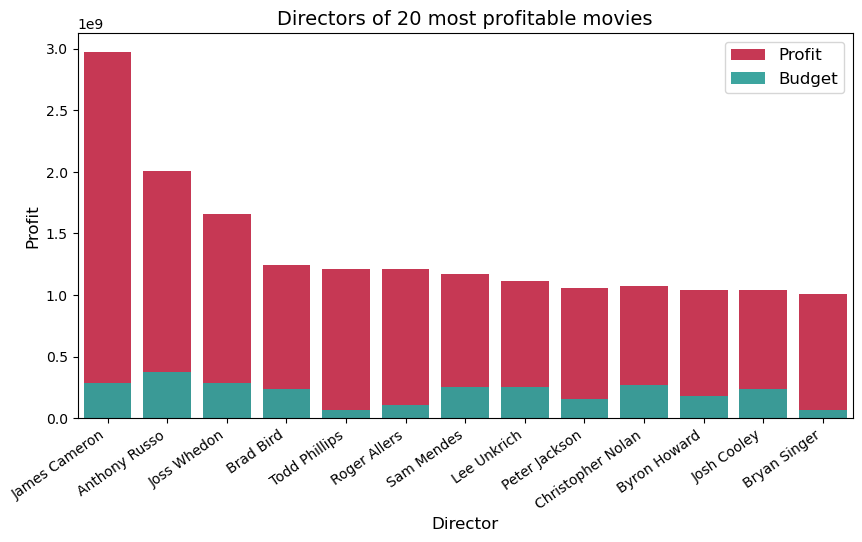

In [107]:
plt.figure(figsize=(10,5))
sns.barplot(x=Top20_ProfitableMovies['Director'],y=Top20_ProfitableMovies['profit_modified'], 
            color='crimson', alpha=0.95, label='Profit', ci=None)
sns.barplot(x=Top20_ProfitableMovies['Director'],y=Top20_ProfitableMovies['budget_modified'], 
            color='lightseagreen', alpha=0.95, label='Budget', ci=None)
plt.xlabel('Director', fontsize=12)
plt.title("Directors of 20 most profitable movies", fontsize=14)
plt.ylabel('Profit', fontsize=12)
plt.xticks(rotation=35, horizontalalignment='right', fontsize=10)
plt.legend(fontsize=12)

In [108]:
Top20_ProfitableMovies['Director']

623        James Cameron
59         Anthony Russo
652        James Cameron
60         Anthony Russo
357          Joss Whedon
891            Brad Bird
33         Todd Phillips
43          Roger Allers
751           Sam Mendes
151          Lee Unkrich
13         Peter Jackson
63     Christopher Nolan
583        Anthony Russo
618        Peter Jackson
2      Christopher Nolan
330         Byron Howard
596          Josh Cooley
10         Peter Jackson
5          Peter Jackson
342         Bryan Singer
Name: Director, dtype: object